In [1]:
import pandas as pd
from datetime import datetime
import os
import spacepy.pycdf as pycdf
import matplotlib.pyplot as plt
import numpy as np
import time as tm

data_folder_path = './voyager-1-pws-wf/data'
cleaned_filename = './voyager1-impacts/voyager1-impacts-unique-cleaned.xlsx'

In [2]:
# Read the Excel file into a dictionary of DataFrames
sheets = pd.read_excel(cleaned_filename, header=0)
print(sheets)
print(sheets.columns)

   PART#/MOD16.MOD60  YYYY-DDD     SCET TIME  YYYY-MM-DD         new scet  \
0     2/27204.35.719  1980-060  00:13:38.204  1980-02-29  00:14:21.283999   
1     2/27204.57.170  1980-060  00:31:14.204  1980-02-29  00:31:24.344000   
2     2/47474.21.145  1982-004  16:02:18.421  1982-01-04  16:02:27.061000   
3     2/51317.18.425  1982-132  18:23:55.054  1982-05-12  18:24:20.494000   
4     2/52730.44.334  1982-179  21:08:33.822  1982-06-28  21:08:53.802000   
..               ...       ...           ...         ...              ...   
56    8/58809.58.342  2017-124  02:54:27.387  2017-05-04  02:54:45.847000   
57    9/03774.28.239  2018-109  03:18:17.093  2018-04-19  03:18:29.411000   
58    9/31227.11.188  2020-294  05:28:07.055  2020-10-20  05:28:16.274999   
59    9/44163.43.223  2021-359  10:41:23.424  2021-12-25  10:41:34.743999   
60    9/45289.11.653  2022-031  23:03:45.769  2022-01-31  23:04:22.888999   

             diffs  indexs                                     cdf_file_pat

In [3]:
# file path stores all the cdf files that contains a hit KV: {'YYYY-MM-DD': [PATH1, ...]}
file_paths={}

# traverse through sclk time
for index, row in sheets.iterrows():
    # get the useful information and find the name of the subdirectory
    acc_sclk = row['PART#/MOD16.MOD60']
    date_str = row['YYYY-MM-DD']
    year = date_str[:4]
    # check if sclk time is completed
    if len(acc_sclk)>11:
        year_folder_path = os.path.join(data_folder_path, year)
        # Loop through all files in the directory
        temp = [] # temp folder to store all the paths
        for file_name in os.listdir(year_folder_path):
            # Check if the file name contains the date string and ends with '.cdf'
            if date_str in file_name and file_name.endswith('.cdf'):
                # If found, print the full path to the file
                file_path = os.path.join(year_folder_path, file_name)
                temp.append(file_path)
                
            file_paths[date_str] = temp    
        

print(len(file_paths))
print(file_paths['1980-02-29'])

59
['/Volumes/Garrys_T7/Voyager/voyager-1-pws-wf/data/1980/vg1_pws_wf_1980-02-29T00_v1.0.cdf']


date = 1980-02-29, sclk = 27204:35:719, scet = 1980-02-29 00:14:21.283999
date = 1980-02-29, sclk = 27204:57:170, scet = 1980-02-29 00:31:24.344000
date = 1982-01-04, sclk = 47474:21:145, scet = 1982-01-04 16:02:27.061000
date = 1982-05-12, sclk = 51317:18:425, scet = 1982-05-12 18:24:20.494000
date = 1982-06-28, sclk = 52730:44:334, scet = 1982-06-28 21:08:53.802000
date = 1982-12-15, sclk = 57825:57:687, scet = 1982-12-15 17:19:38.961999
date = 1983-02-11, sclk = 59563:05:078, scet = 1983-02-11 15:01:26.629000
date = 1983-08-10, sclk = 64961:53:036, scet = 1983-08-10 14:03:49.608000
date = 1983-12-05, sclk = 02939:59:784, scet = 1983-12-05 17:21:23.406999
date = 1984-04-03, sclk = 06543:56:379, scet = 1984-04-03 20:30:36.012000
date = 1984-04-03, sclk = 06543:58:391, scet = 1984-04-03 20:32:12.731999
date = 1984-06-22, sclk = 08936:54:672, scet = 1984-06-22 14:53:14.611999
date = 1985-03-28, sclk = 17307:56:196, scet = 1985-03-28 15:42:23.658000
date = 1985-09-04, sclk = 22103:22:730

/var/folders/20/55b3hsxn1xg0_cl04l7tb4y80000gn/T/ipykernel_72046/2940418998.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 10), dpi=100)


date = 1991-04-02, sclk = 35093:40:152, scet = 1991-04-02 10:41:39.923999
date = 1991-05-07, sclk = 36141:10:158, scet = 1991-05-07 08:41:40.345999
date = 1991-11-19, sclk = 42032:40:328, scet = 1991-11-19 17:53:50.269999
date = 1992-03-31, sclk = 46013:10:043, scet = 1992-03-31 10:17:33.105000
date = 1992-10-04, sclk = 51626:35:463, scet = 1992-10-04 13:01:56.746999
date = 1992-10-06, sclk = 51695:10:401, scet = 1992-10-06 19:53:53.010000
date = 1992-10-16, sclk = 51995:20:747, scet = 1992-10-16 20:02:13.697999
date = 1993-02-09, sclk = 55466:10:161, scet = 1993-02-09 12:41:38.030999
date = 1993-03-25, sclk = 56783:01:088, scet = 1993-03-25 10:10:21.355000
date = 1993-04-21, sclk = 57592:54:655, scet = 1993-04-21 10:05:19.181000
date = 1998-01-06, sclk = 43691:11:499, scet = 1998-01-06 13:30:28.938000
date = 1999-11-02, sclk = 63644:41:562, scet = 1999-11-02 16:18:27.747999
date = 2000-08-14, sclk = 06698:11:586, scet = 2000-08-14 23:54:27.855999
date = 2000-12-04, sclk = 10035:15:726

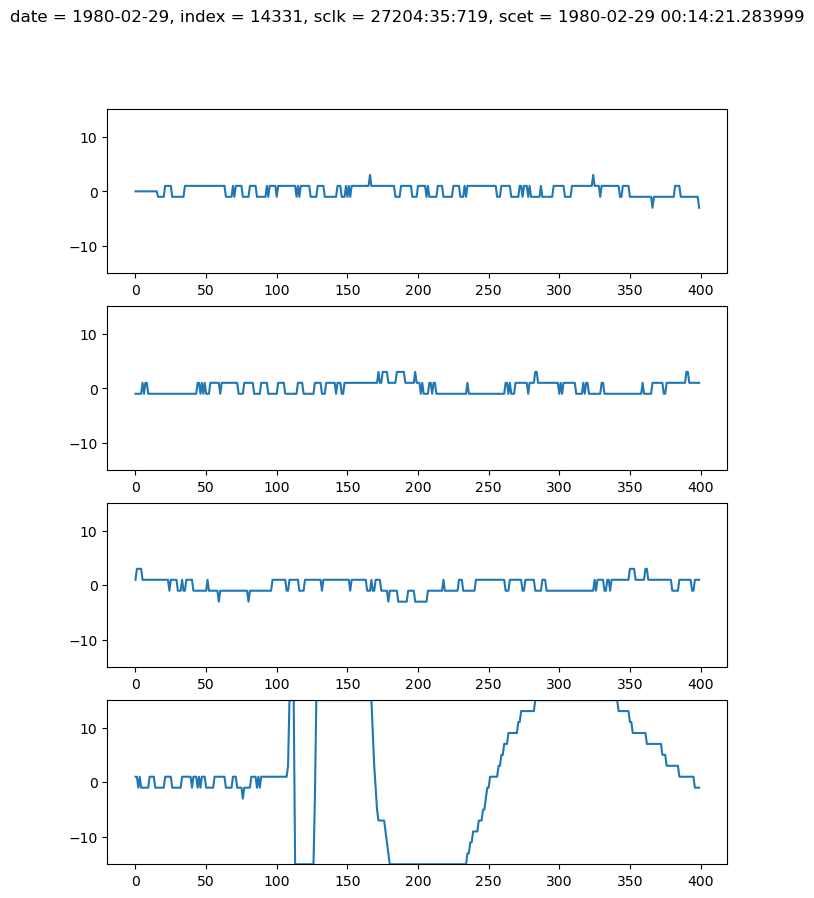

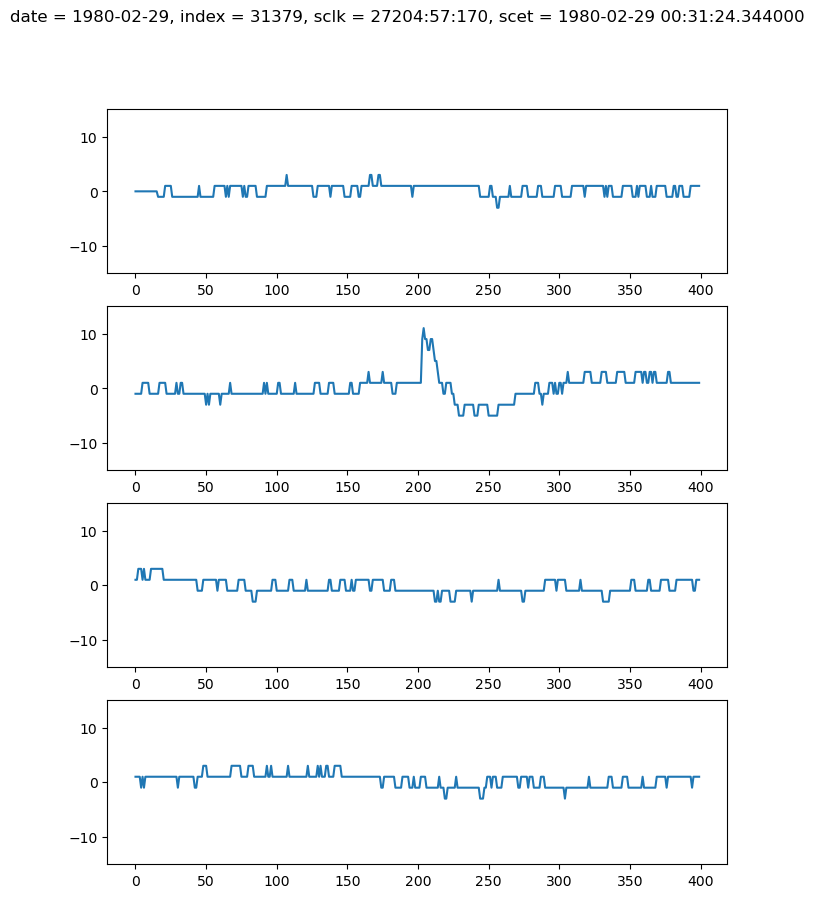

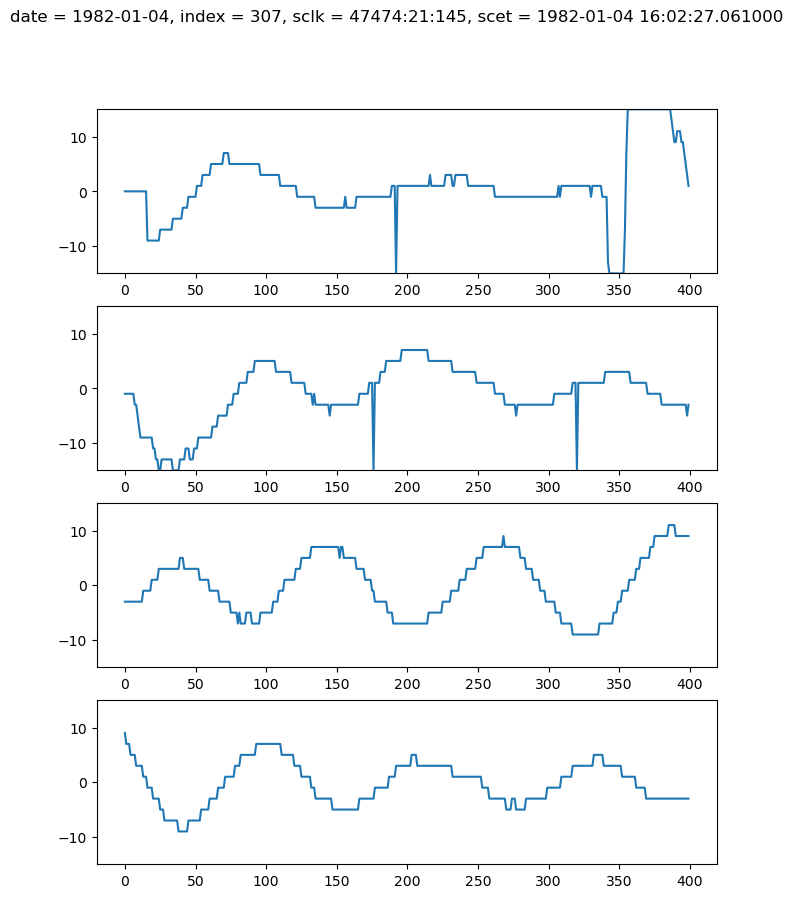

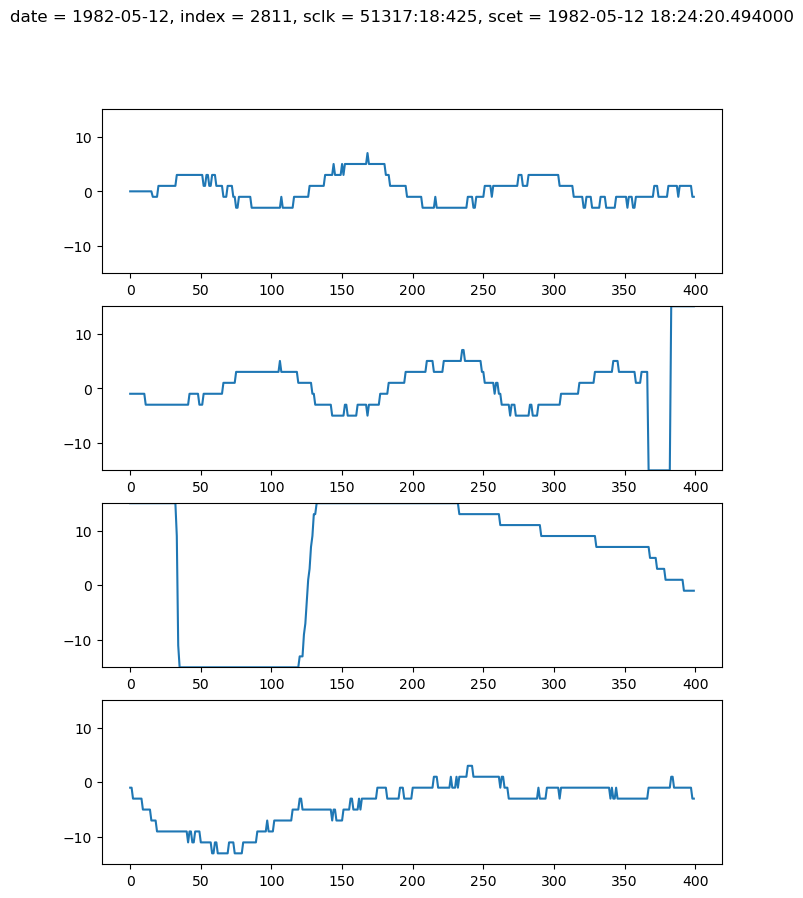

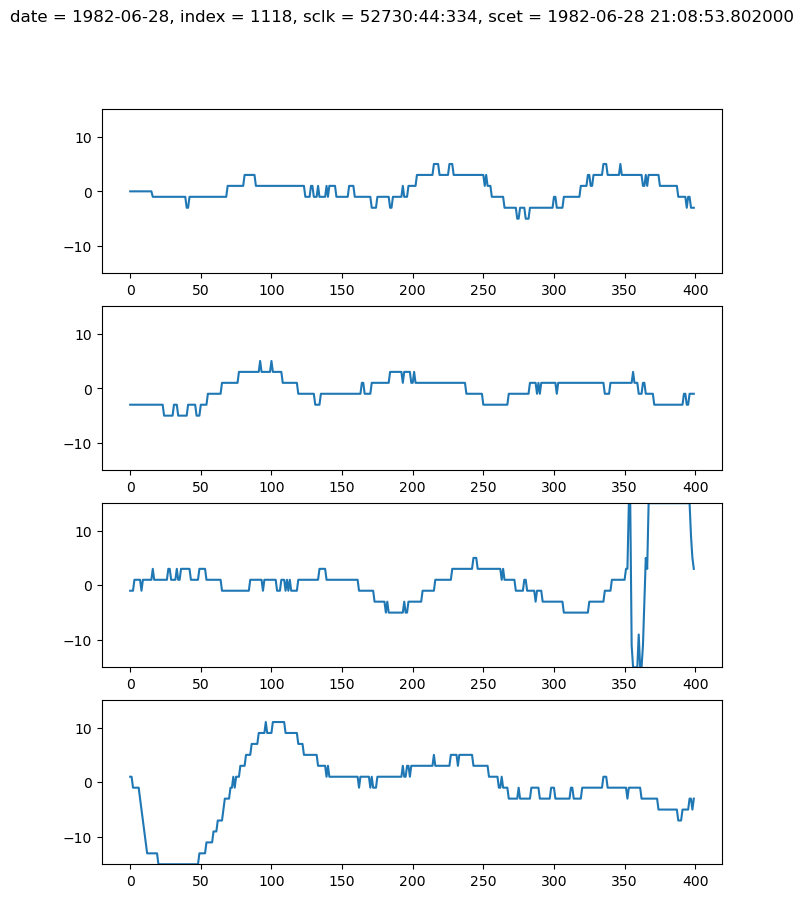

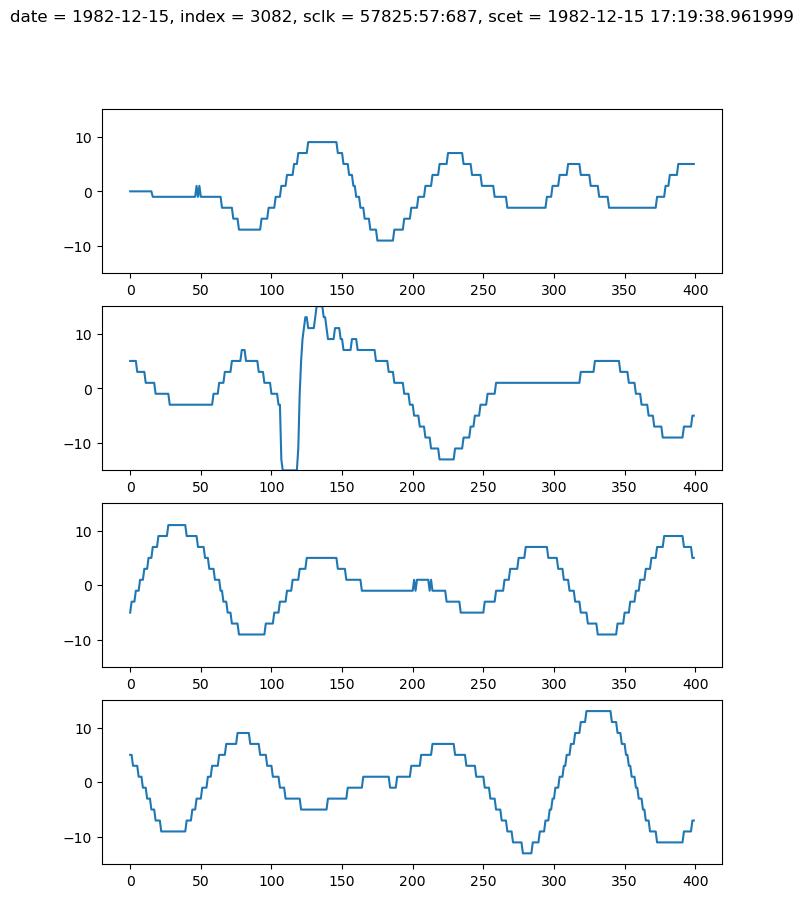

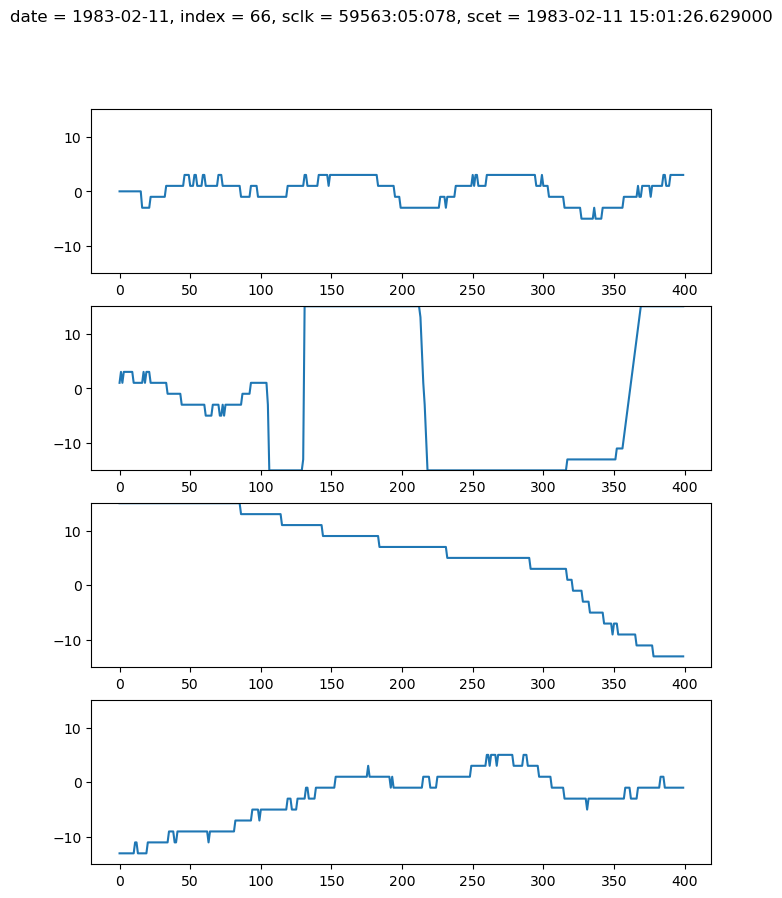

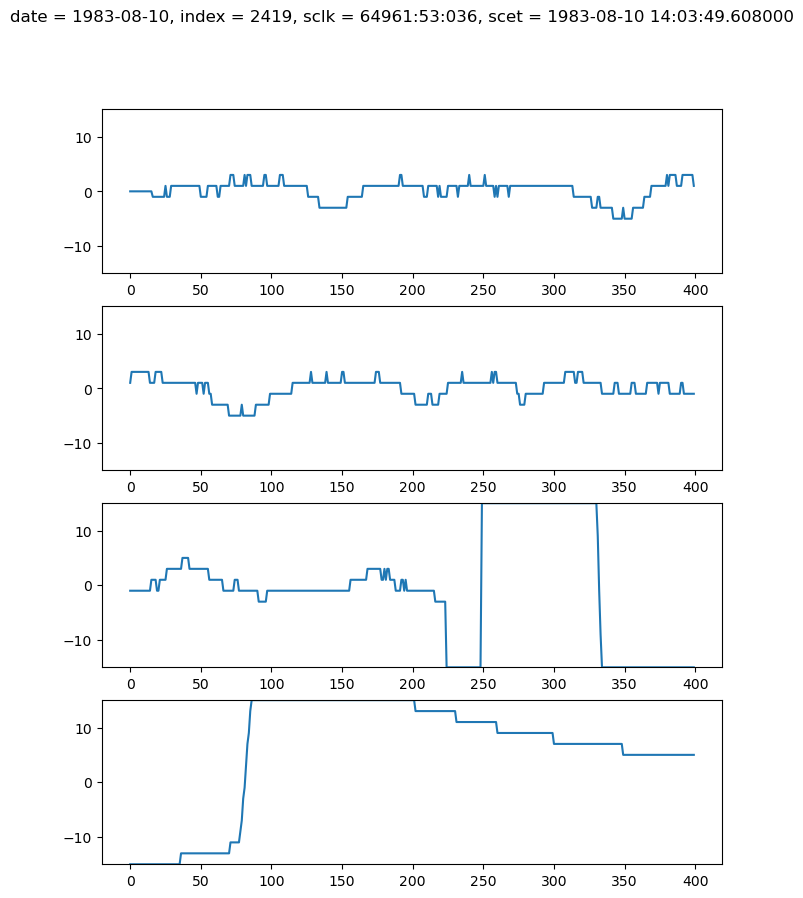

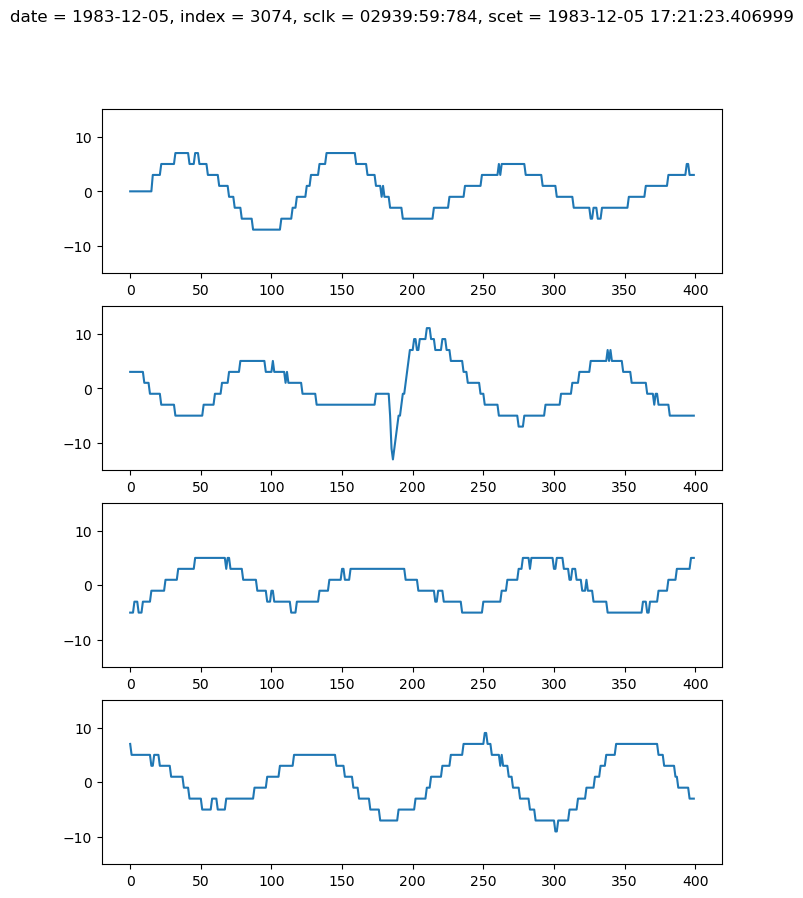

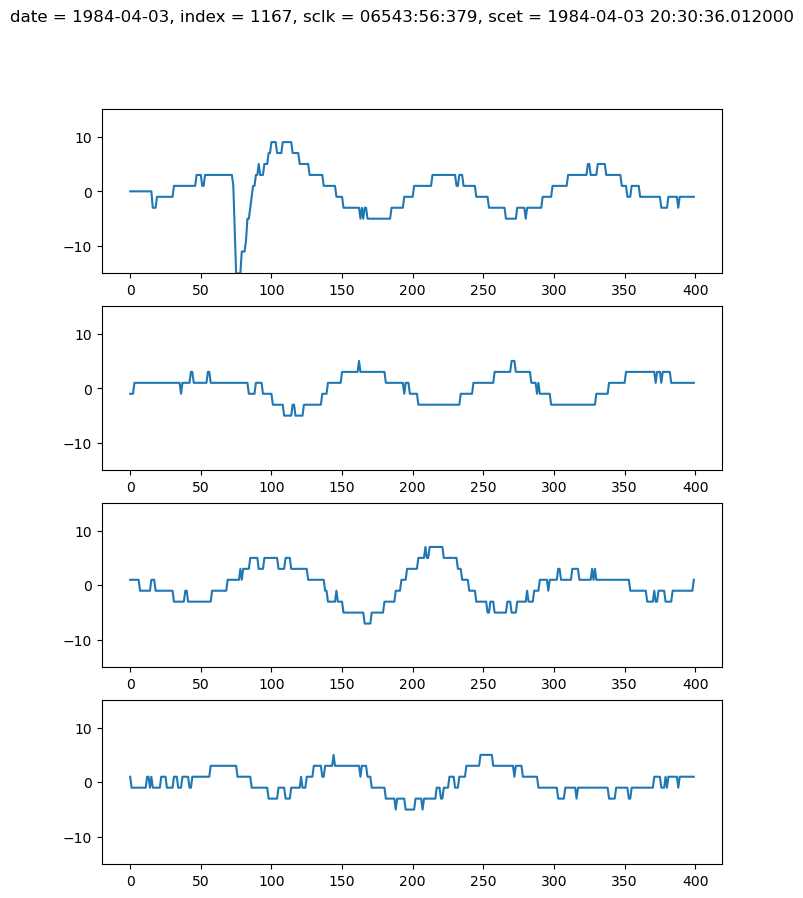

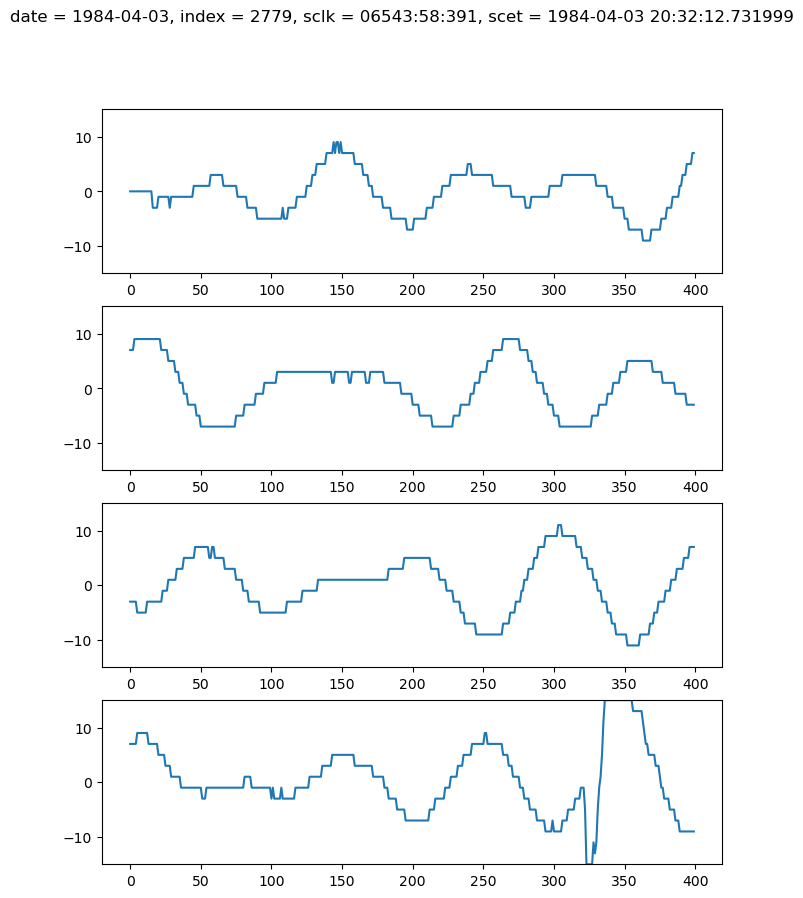

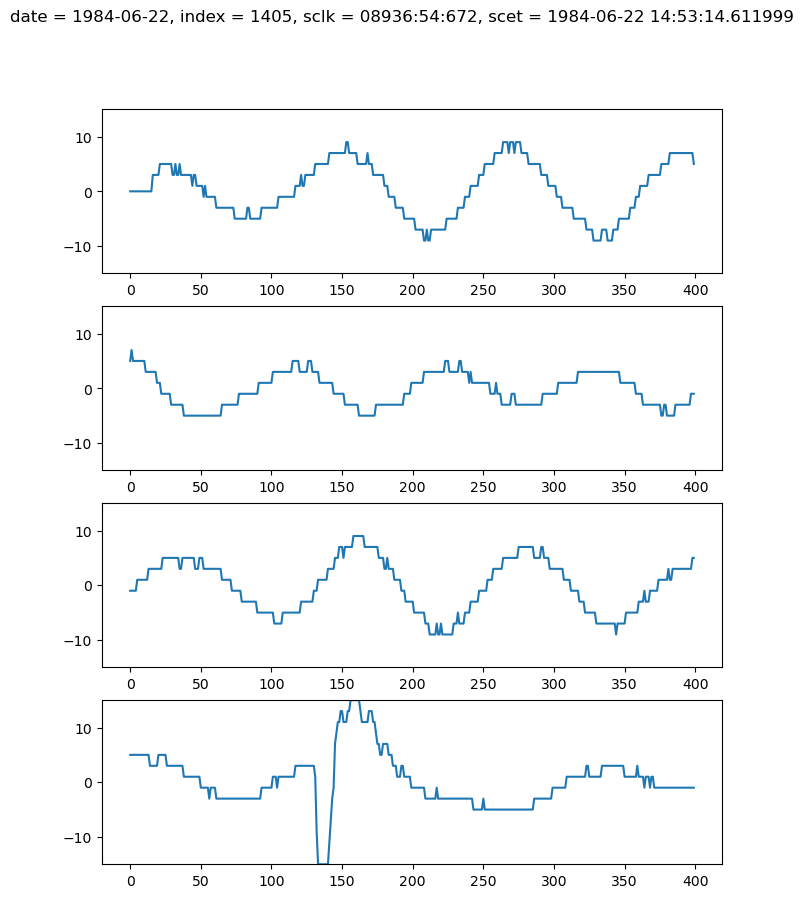

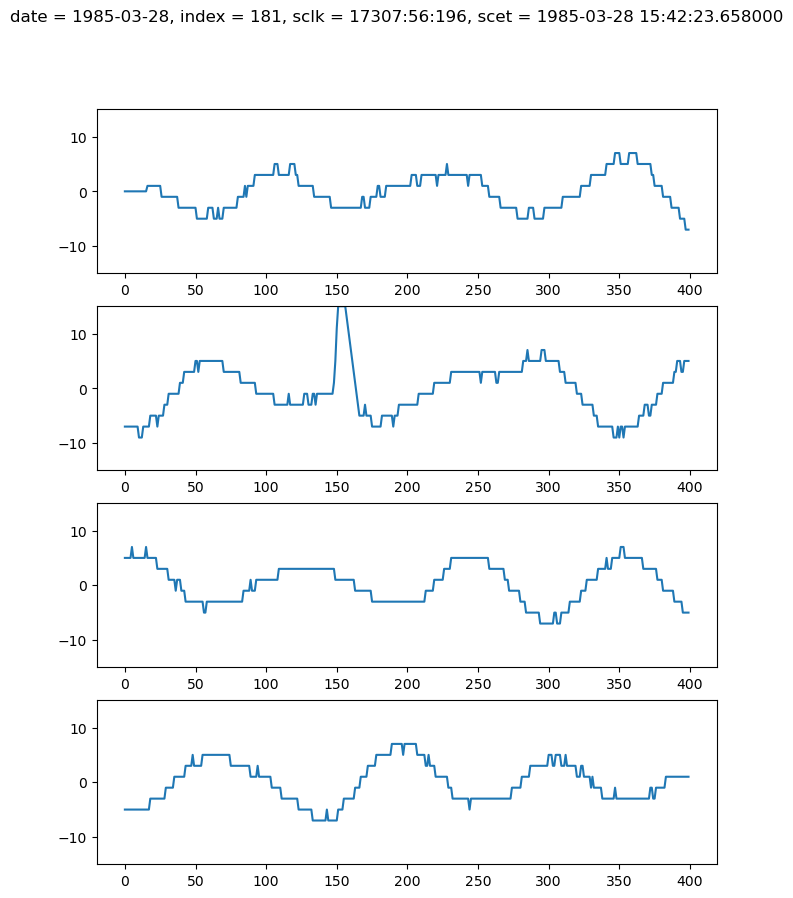

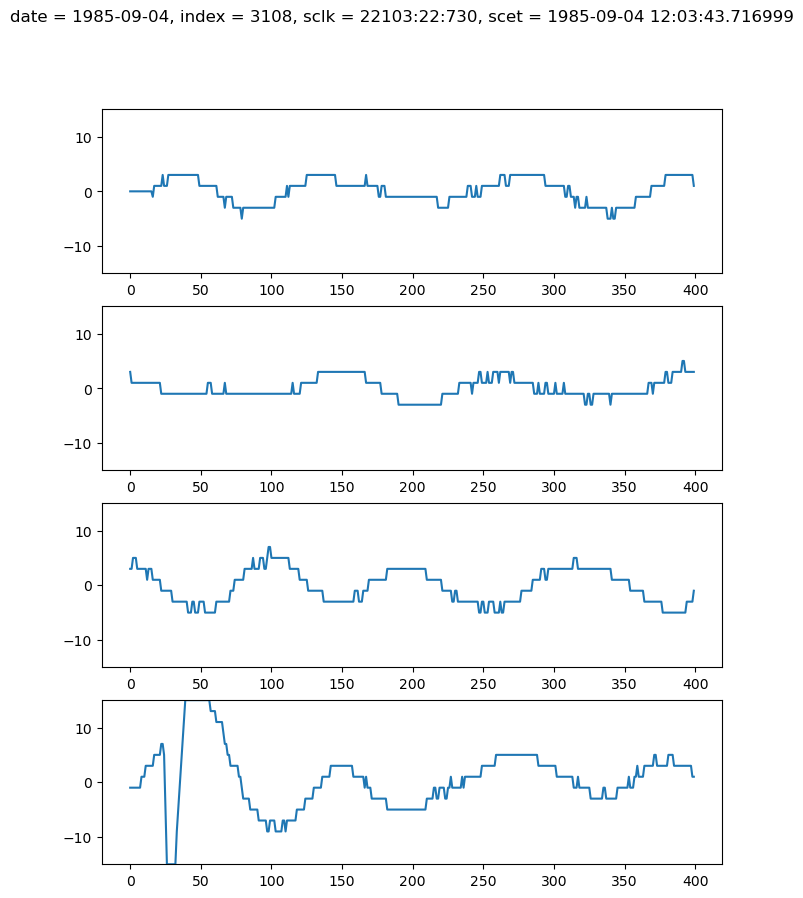

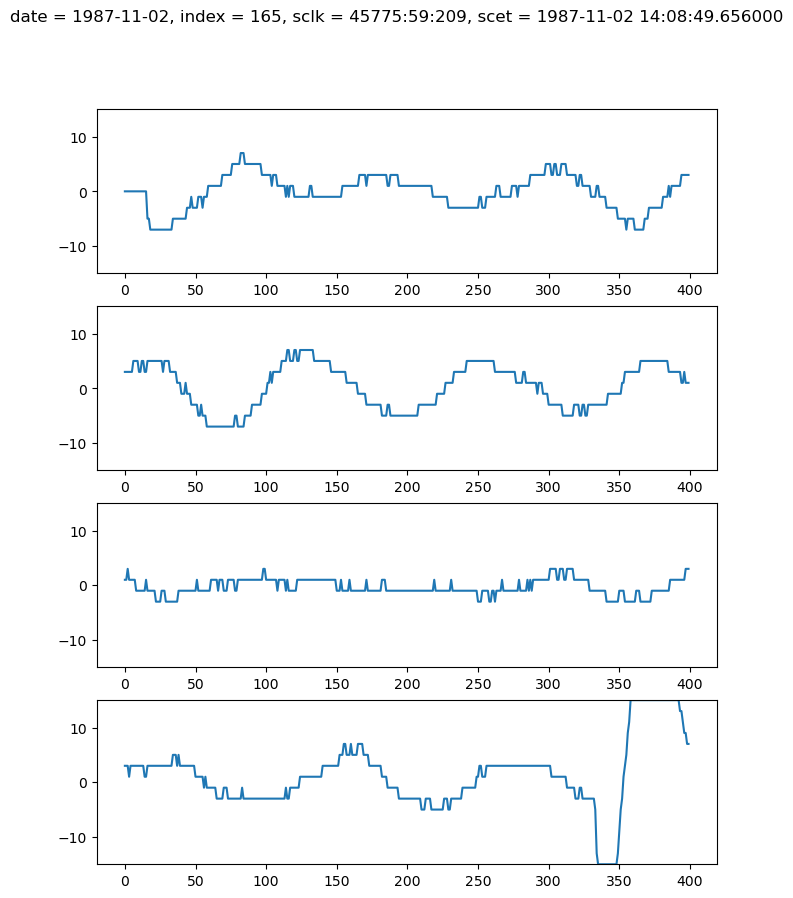

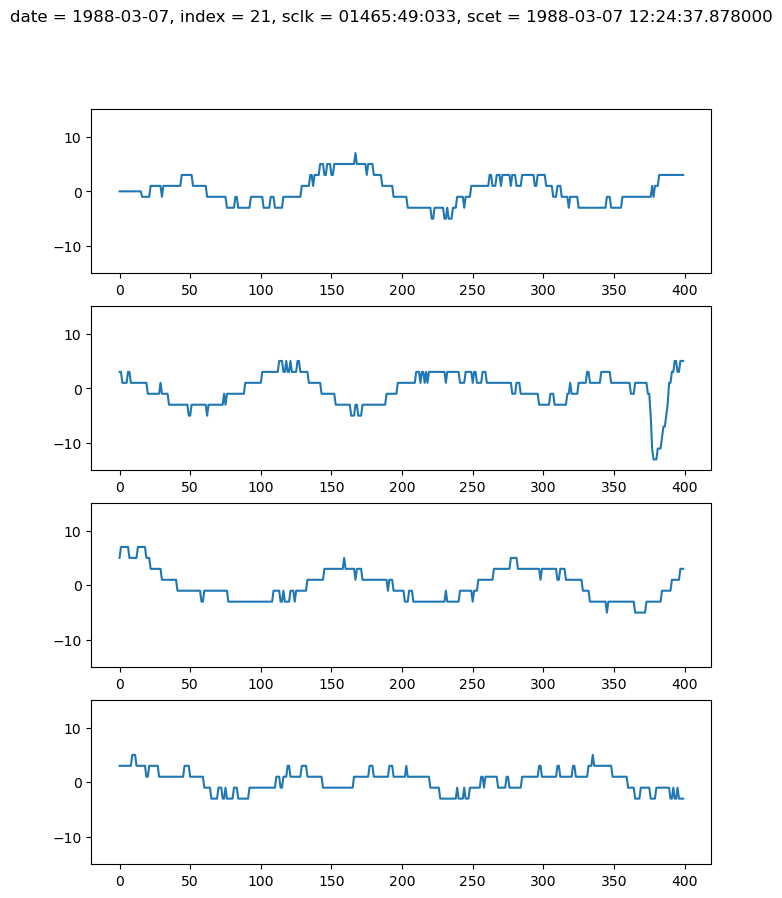

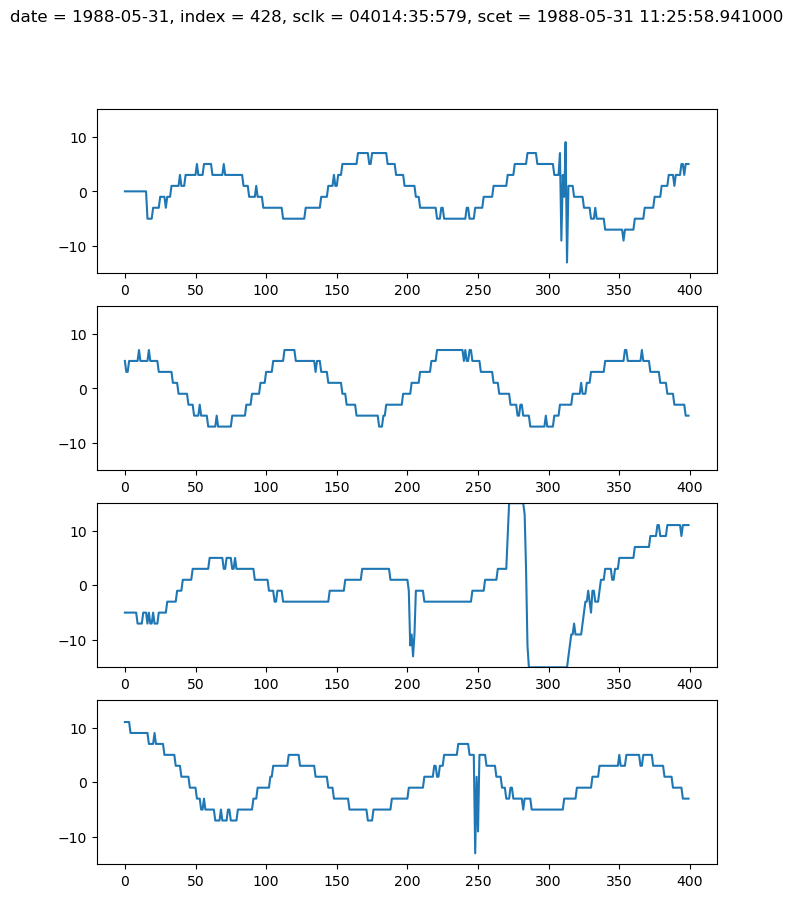

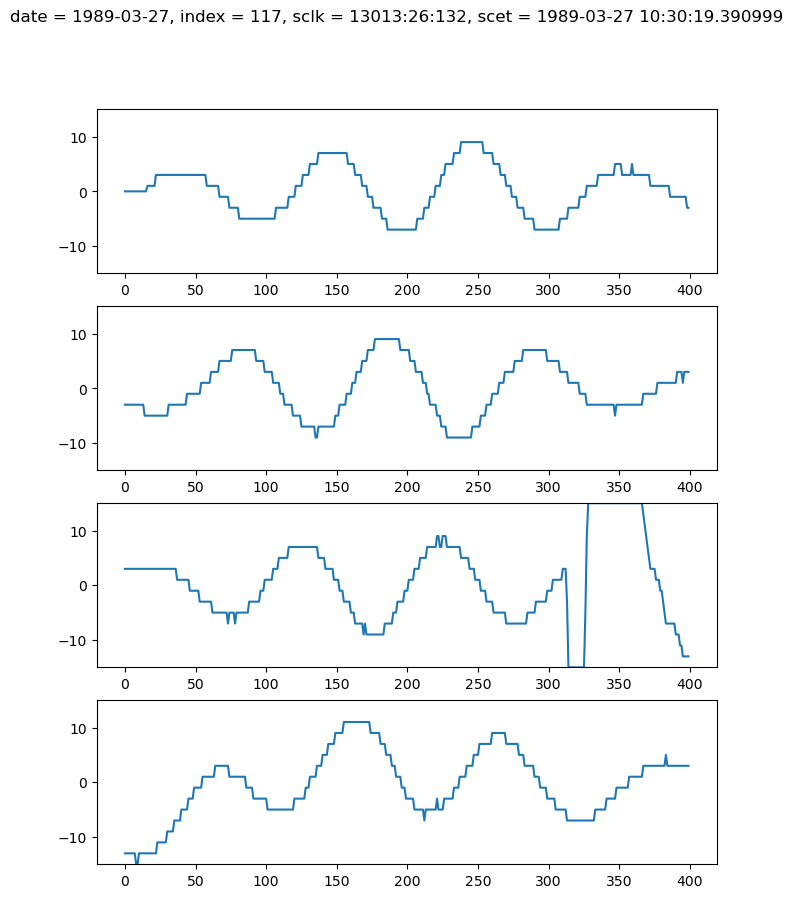

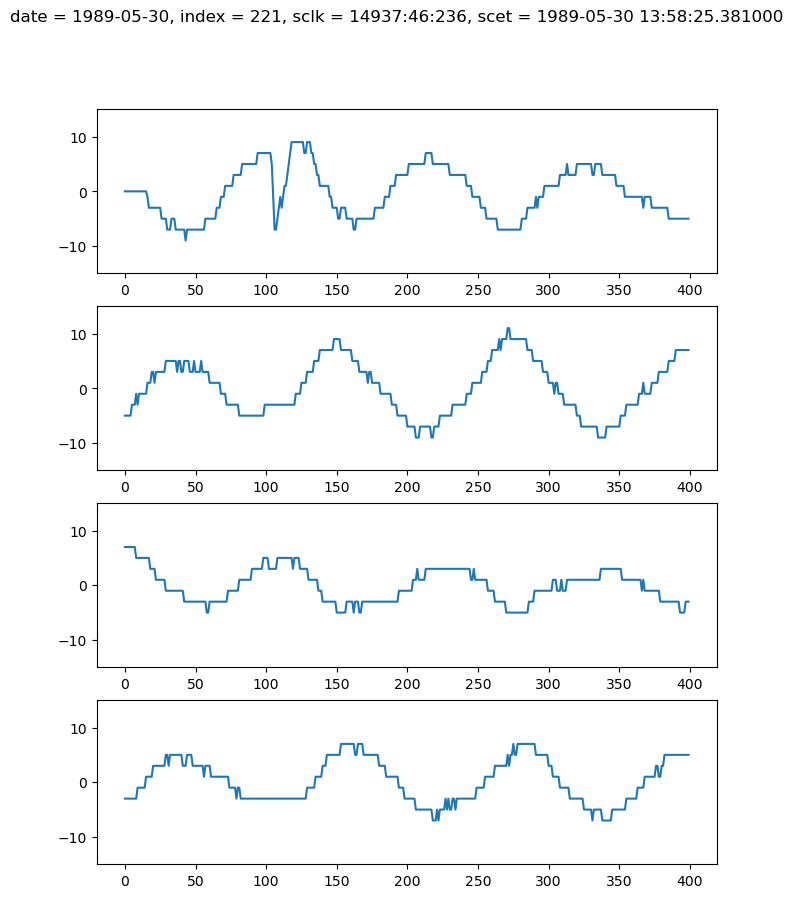

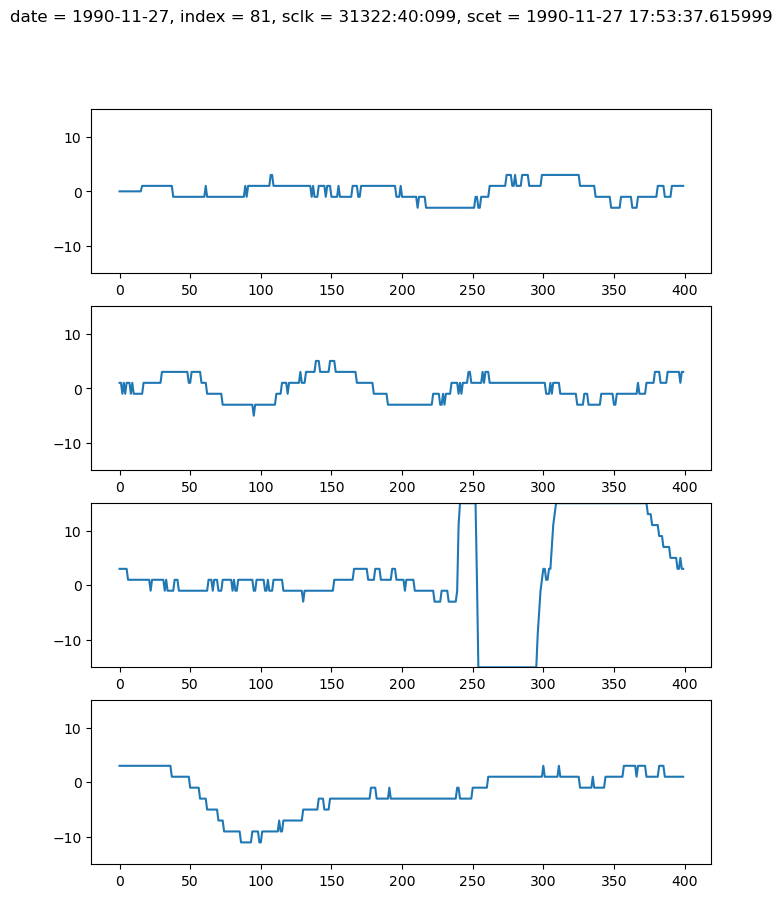

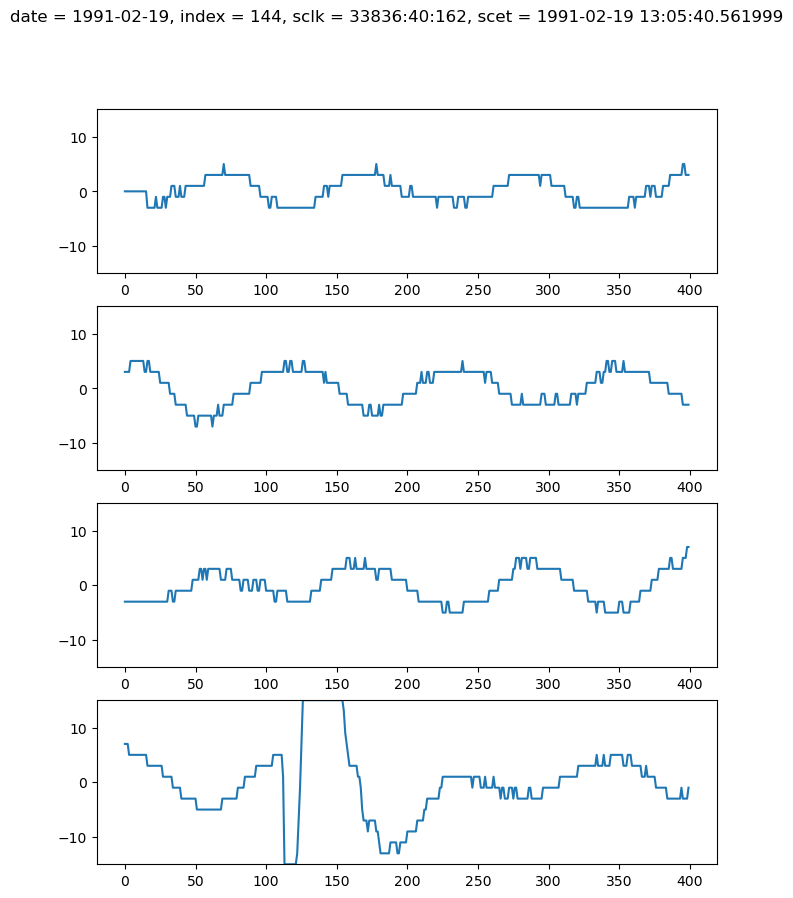

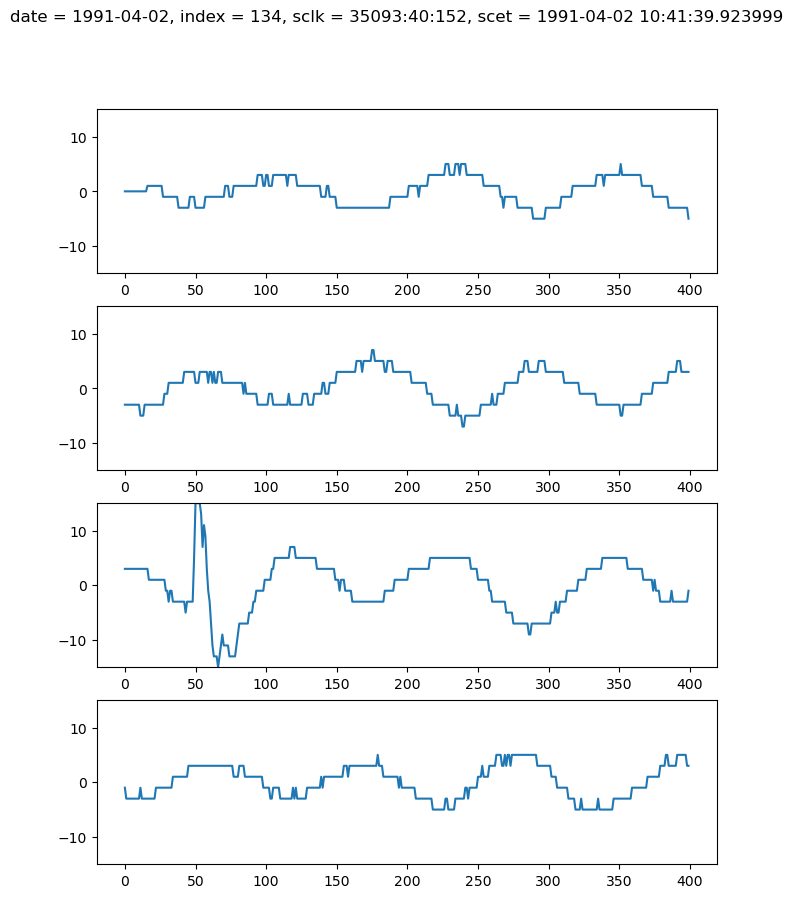

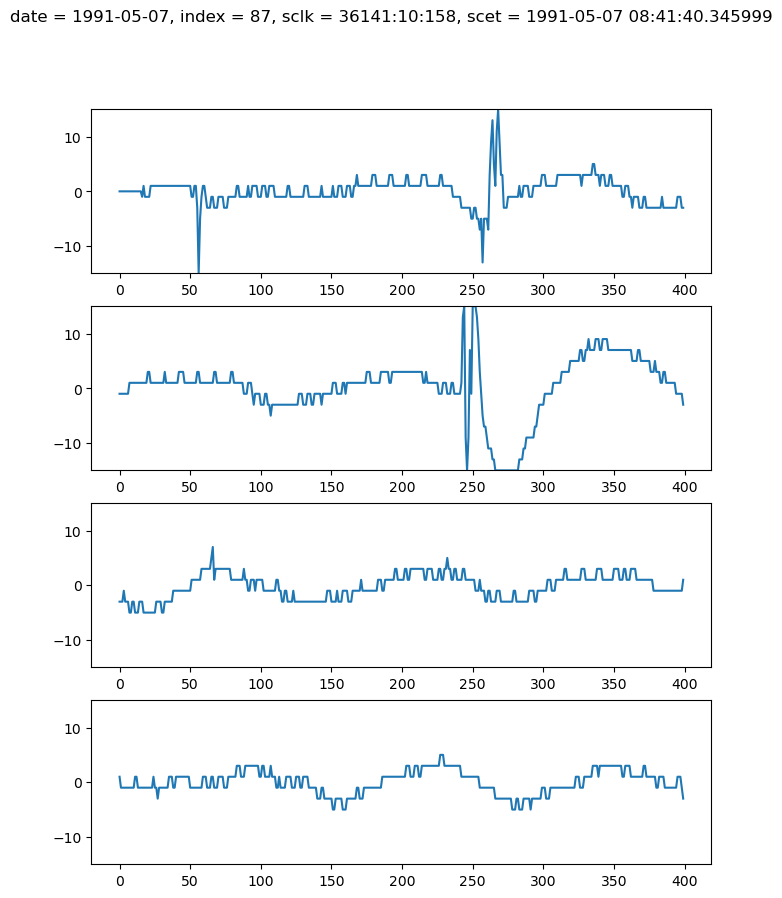

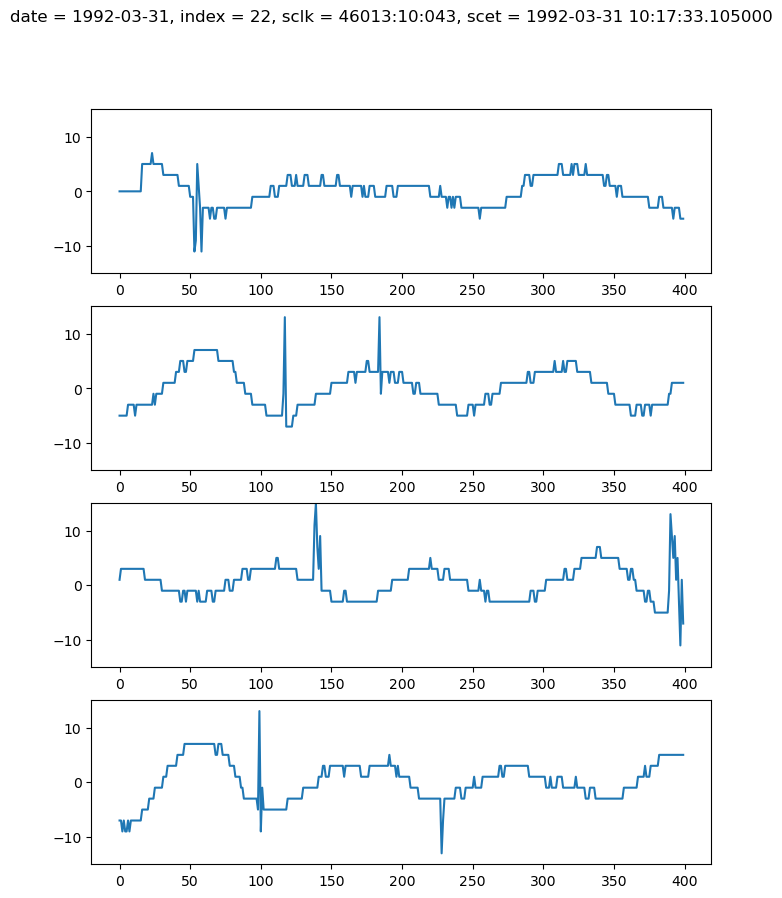

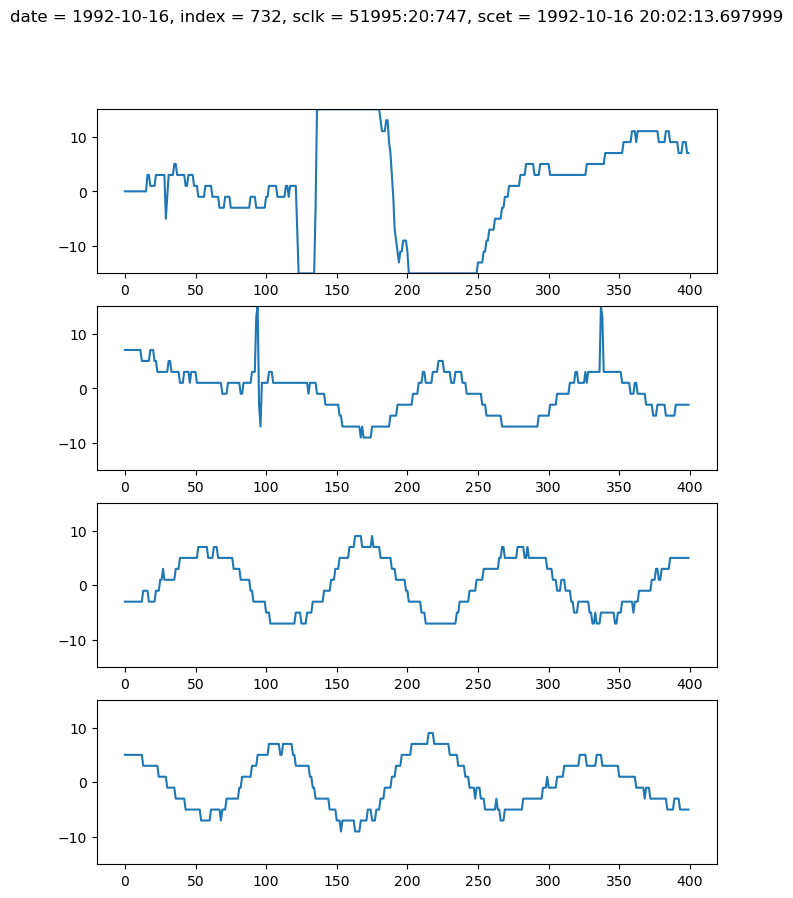

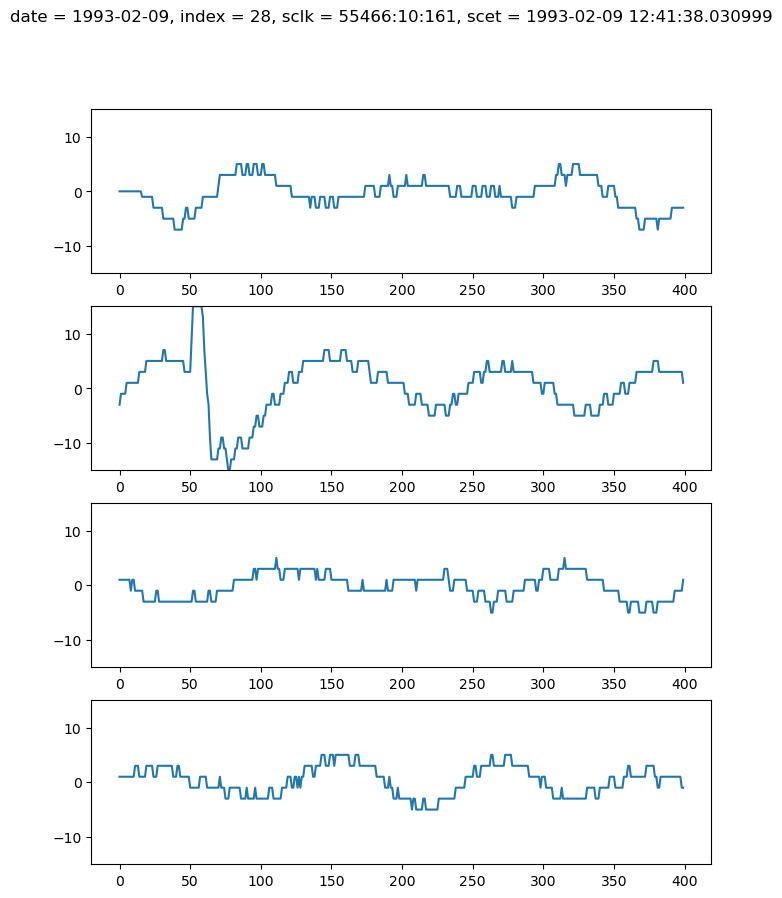

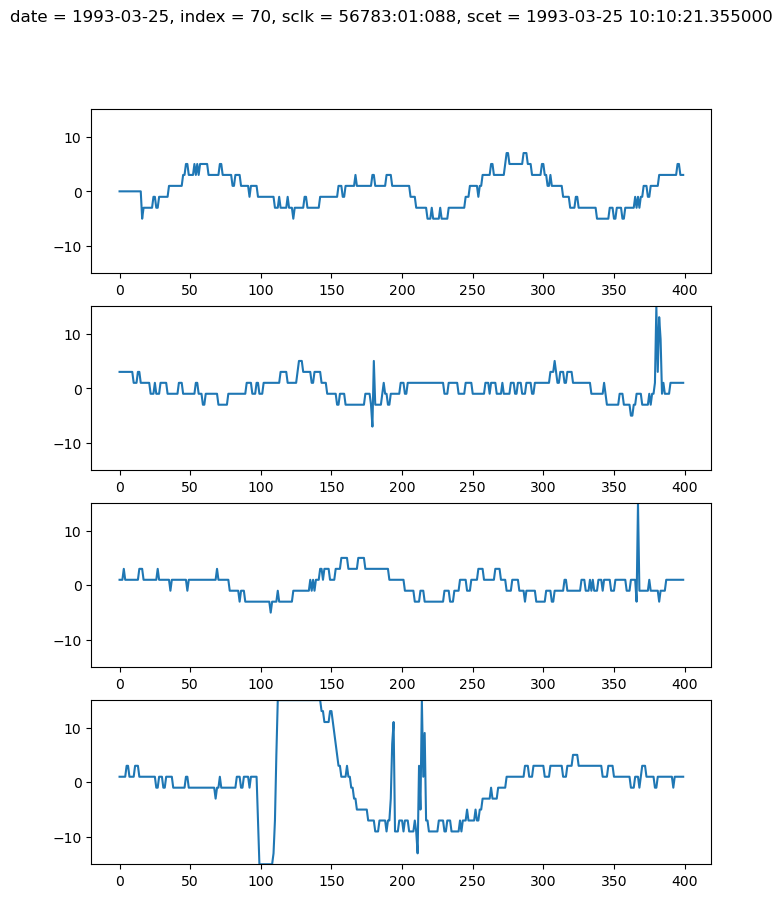

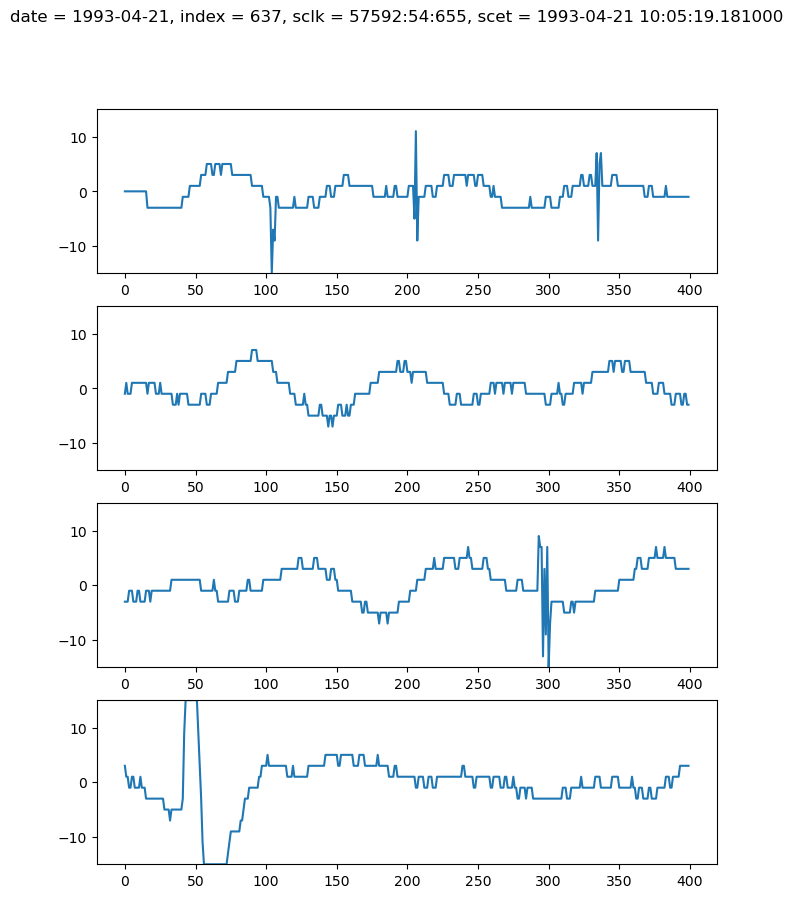

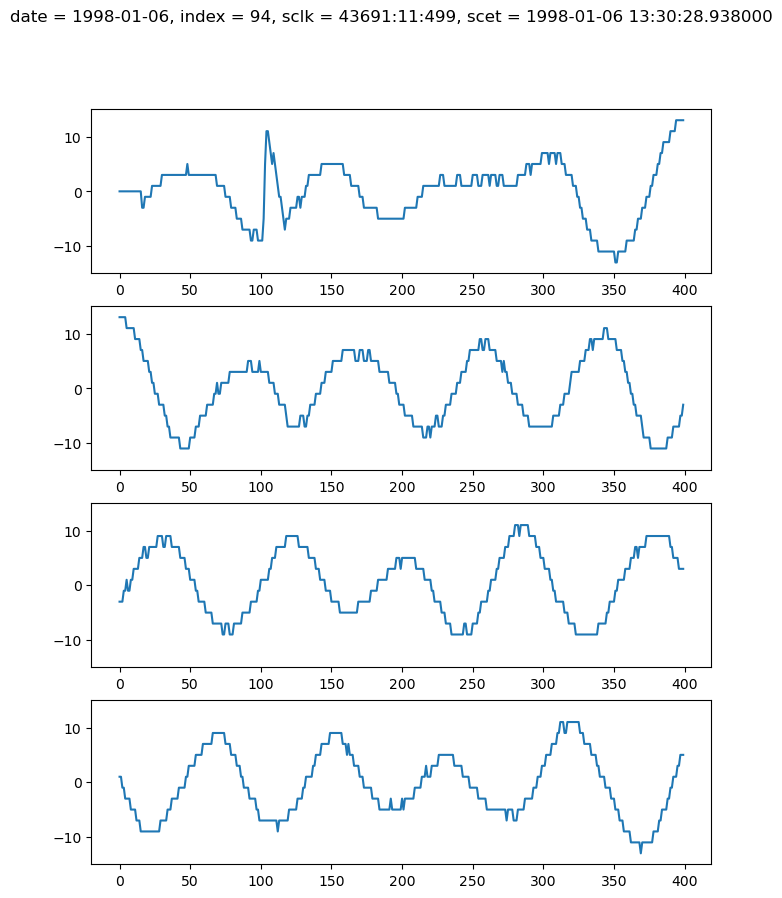

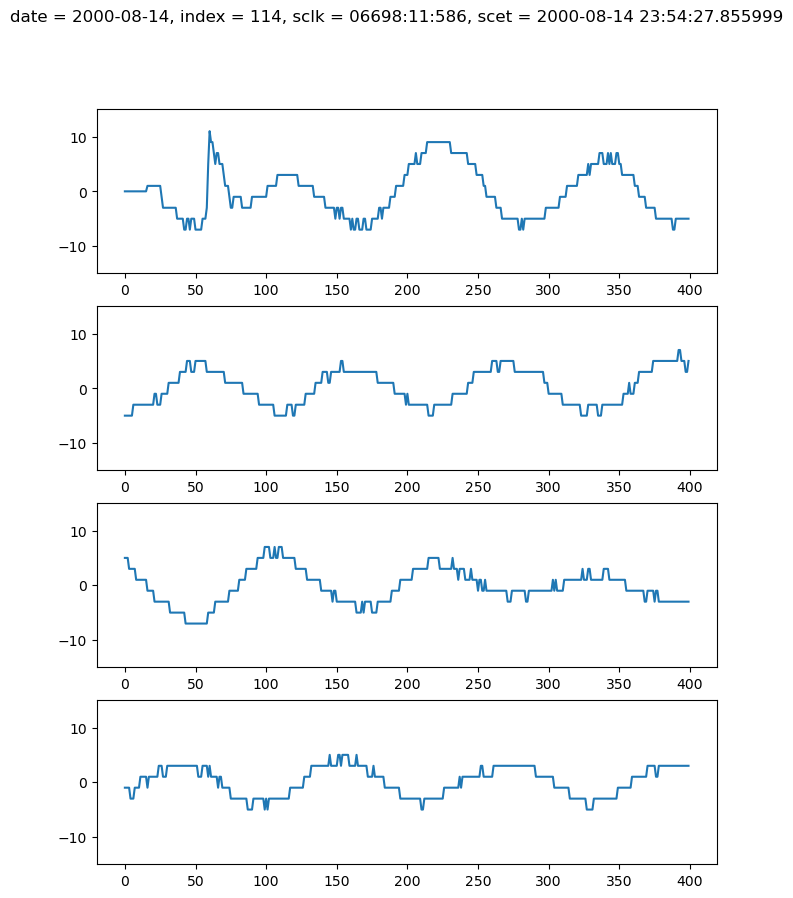

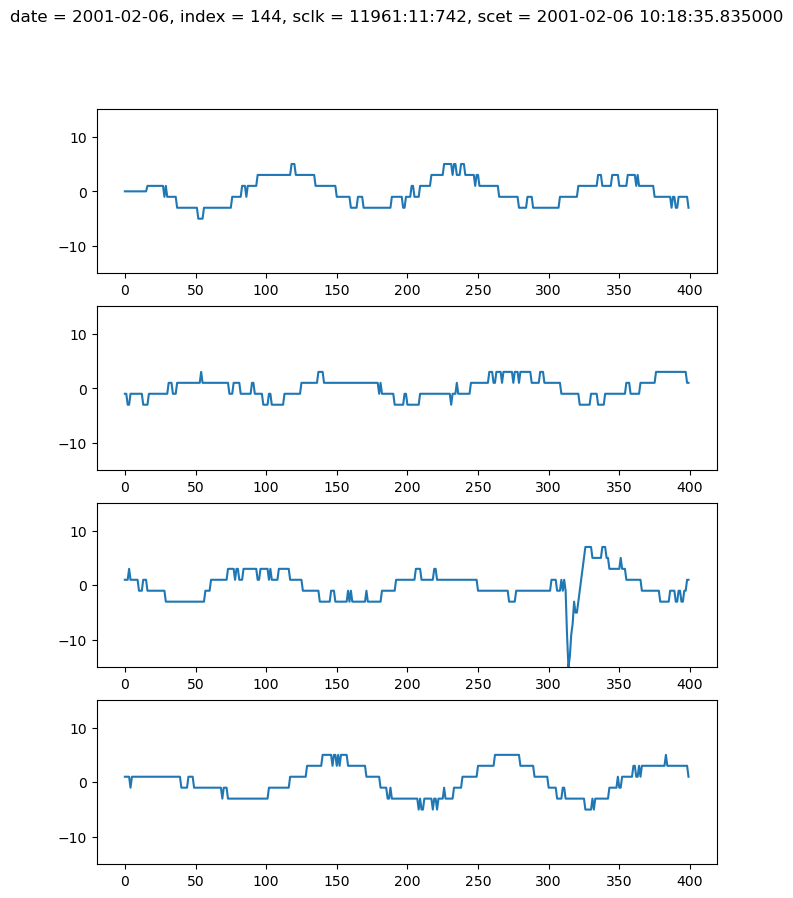

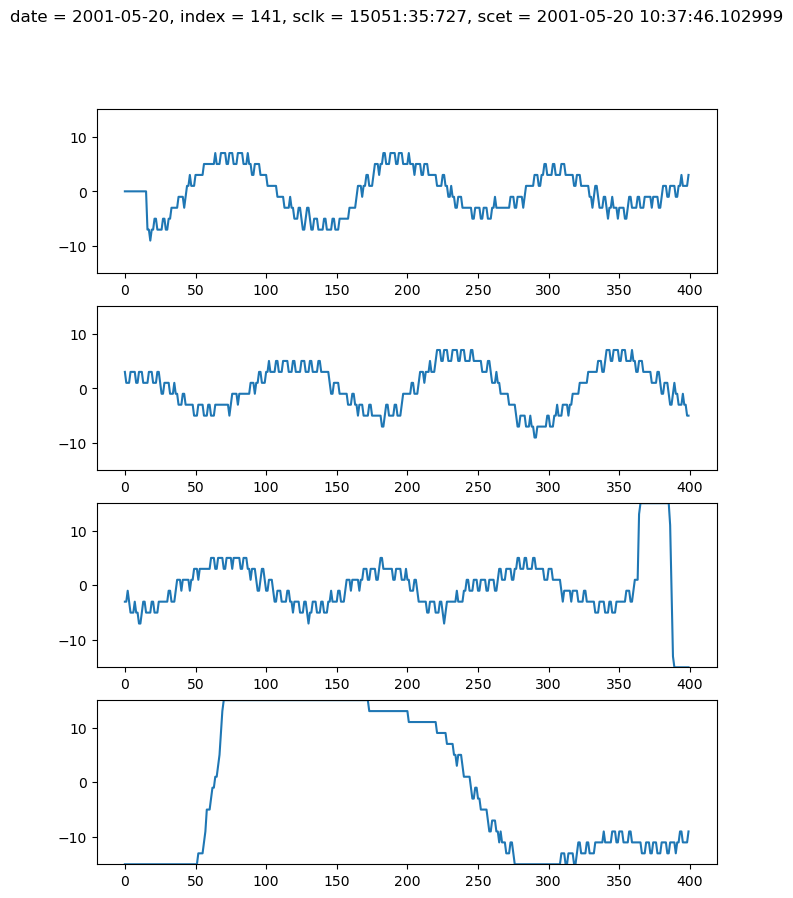

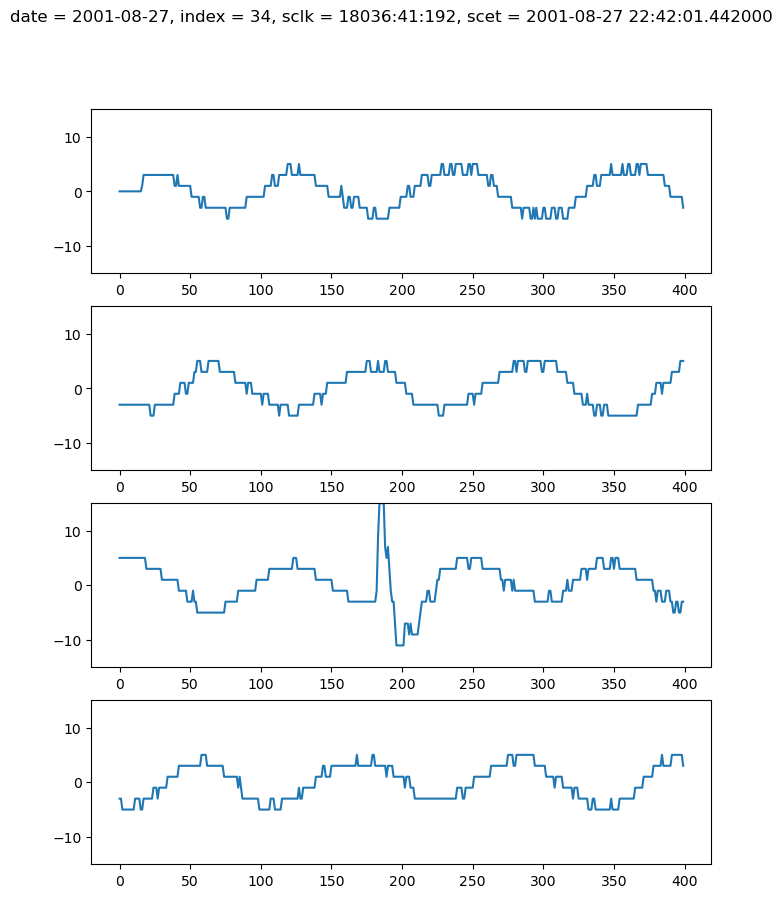

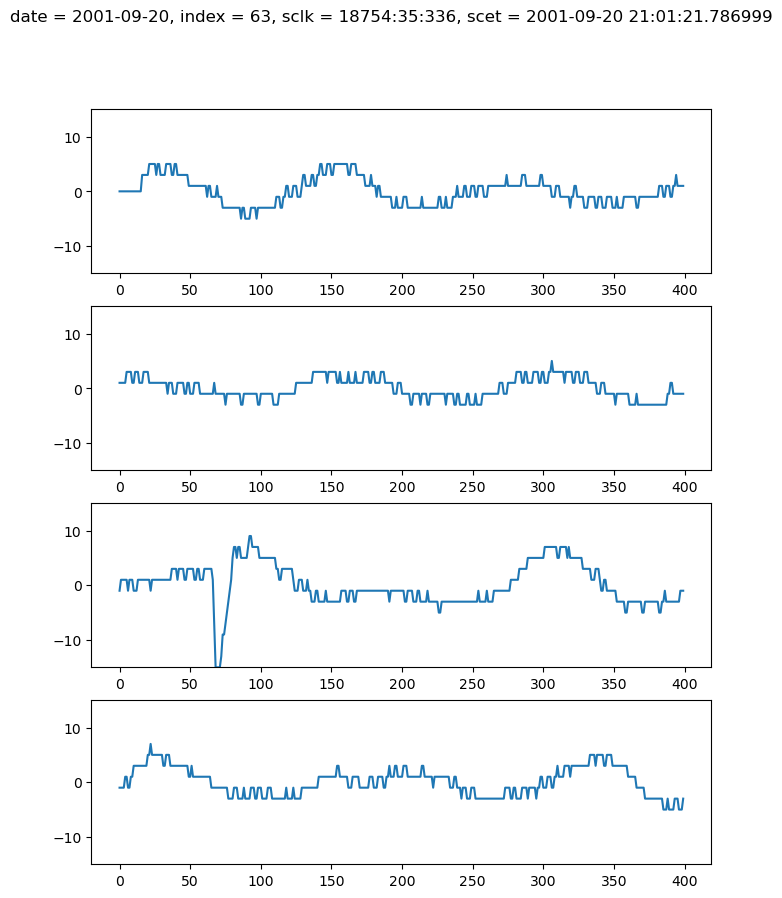

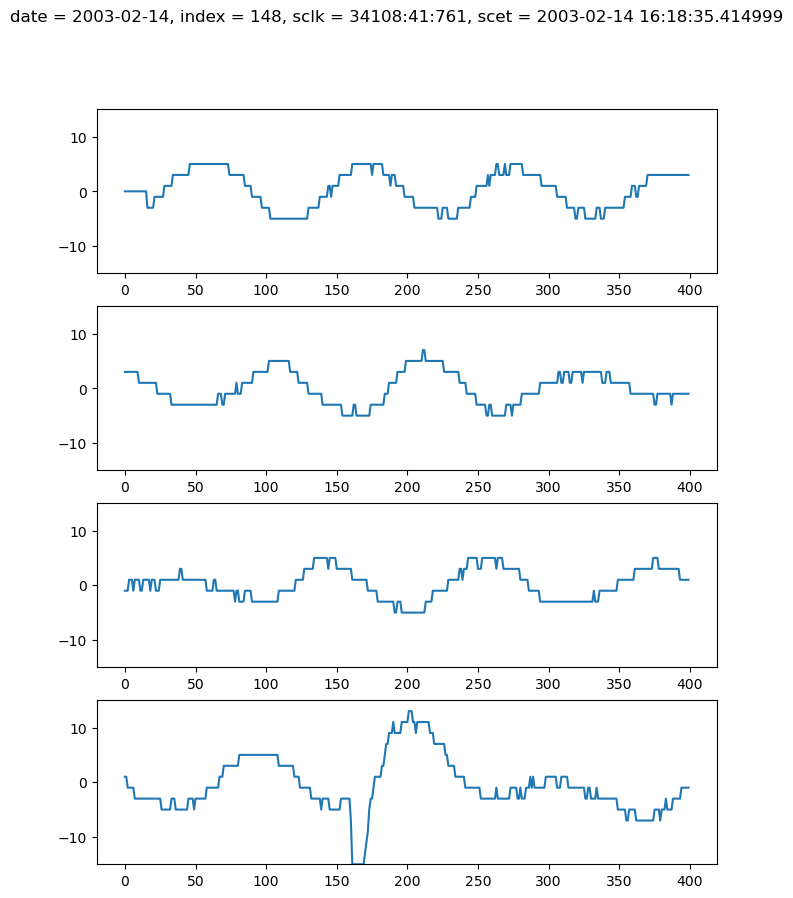

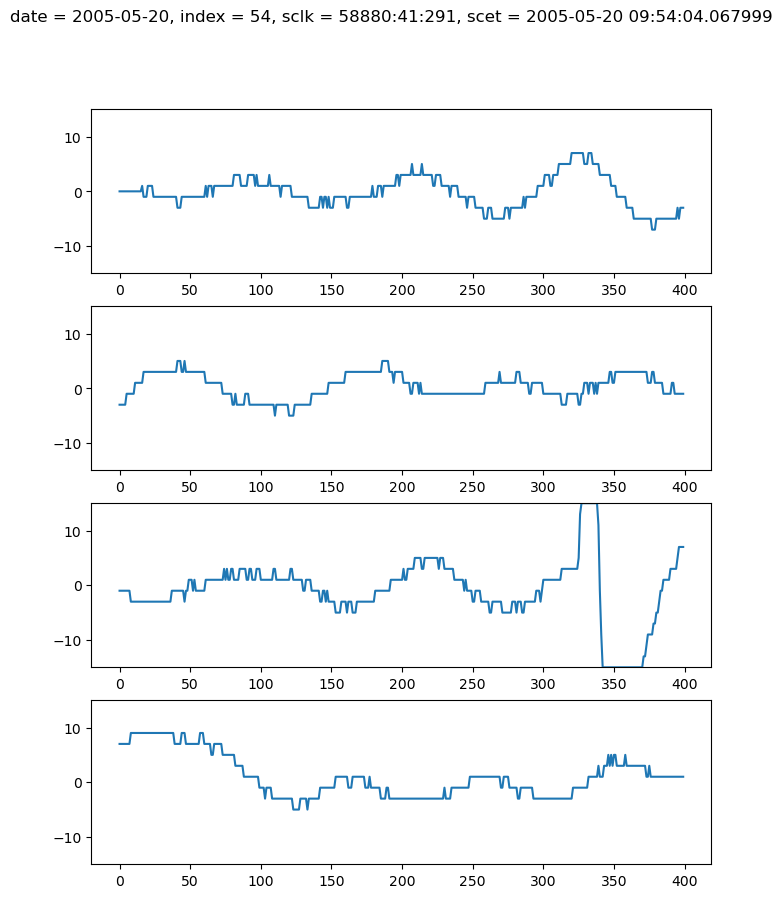

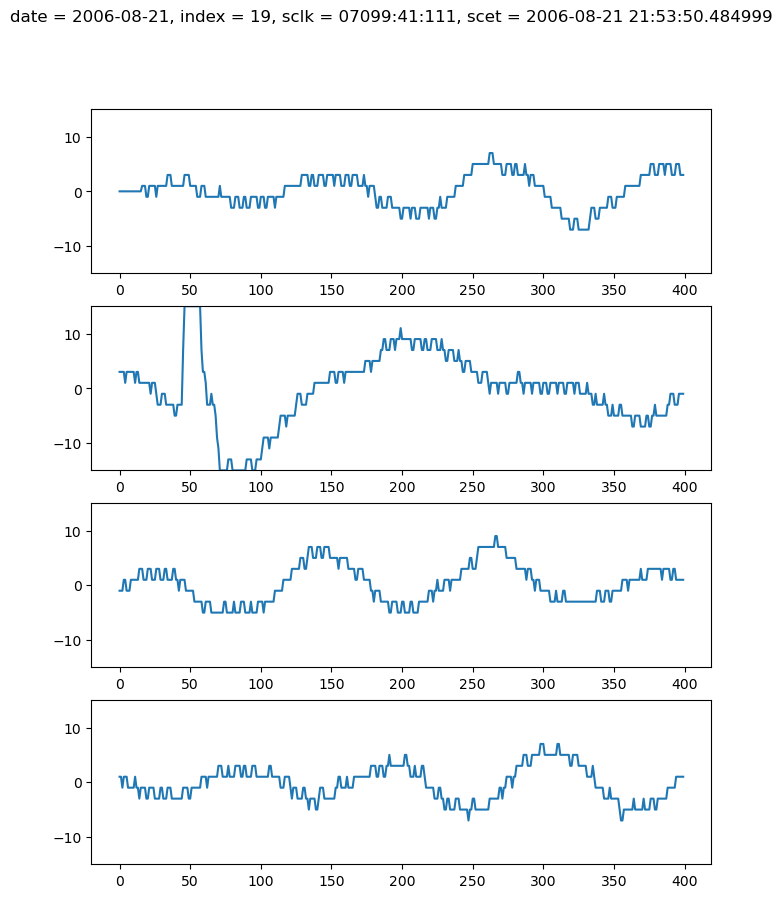

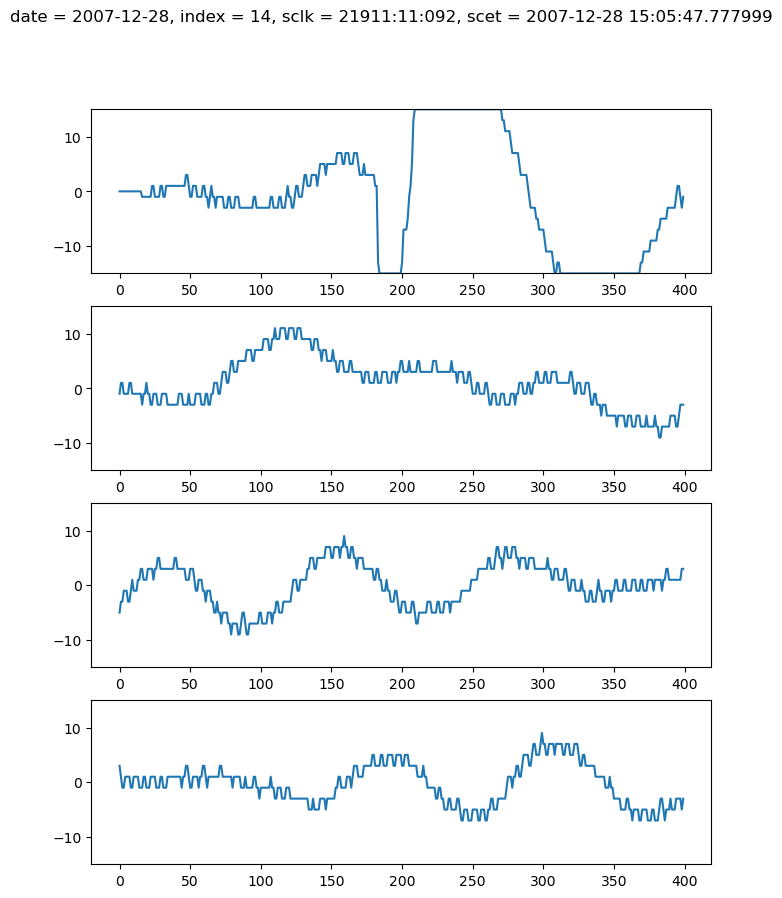

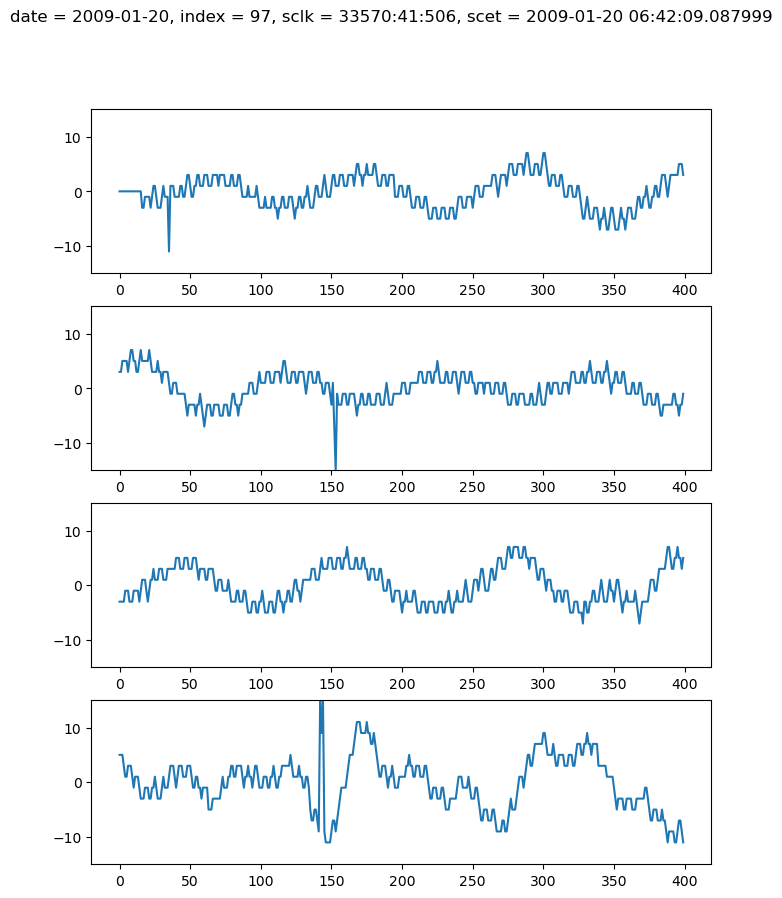

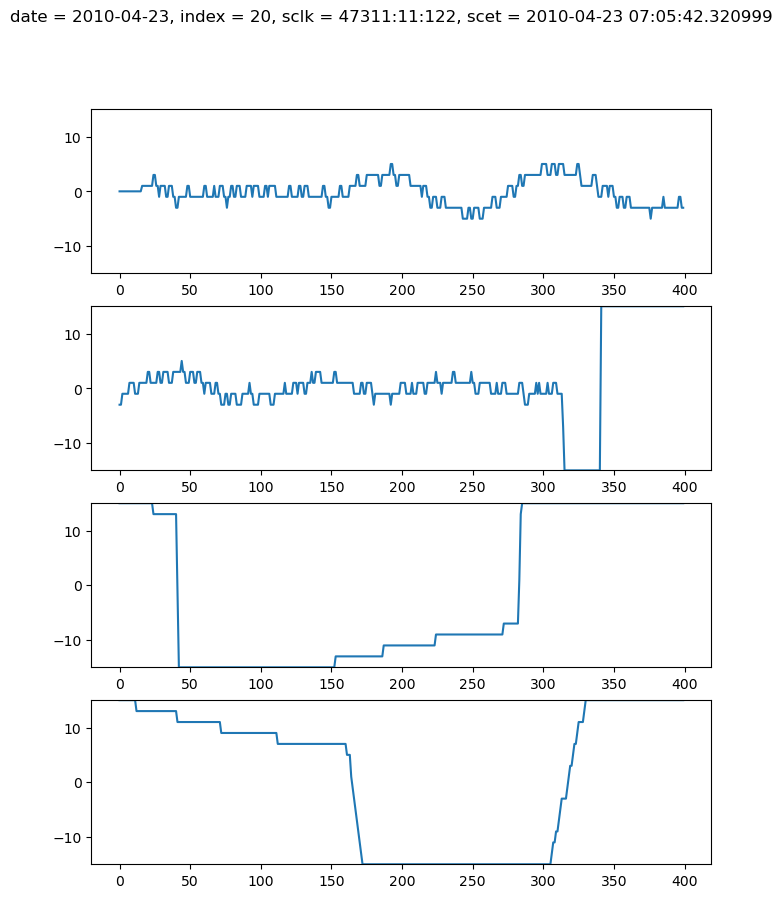

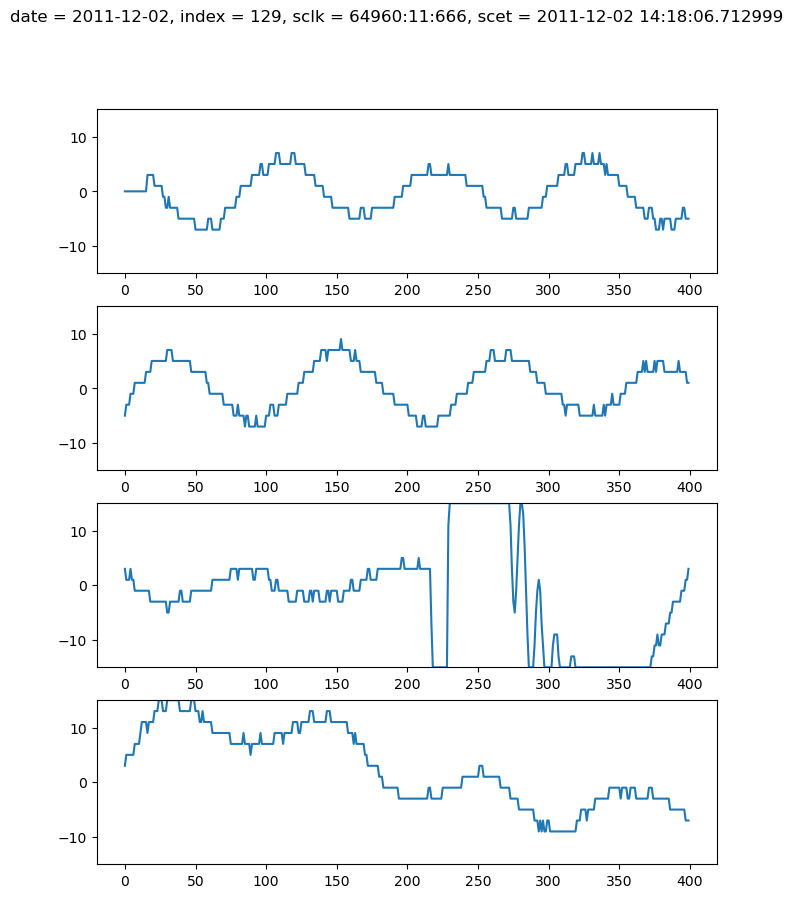

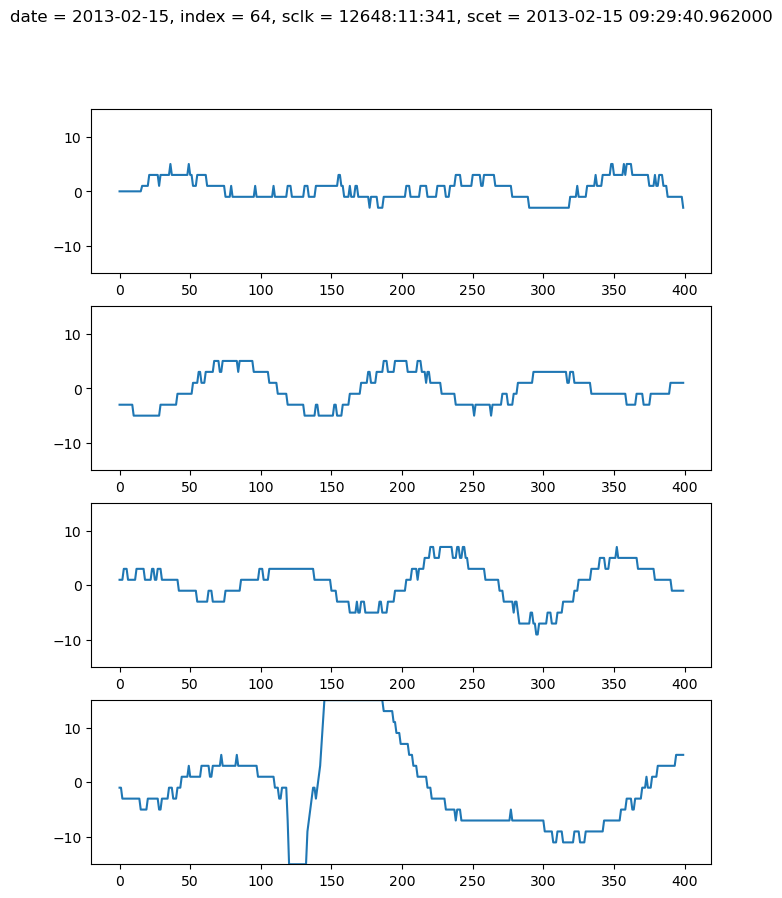

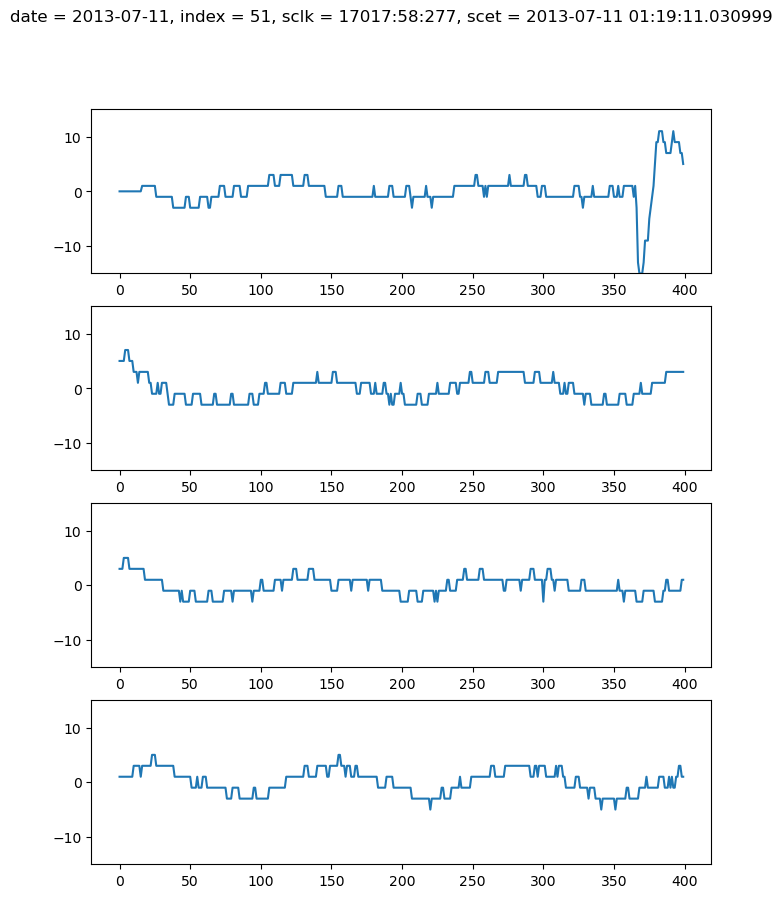

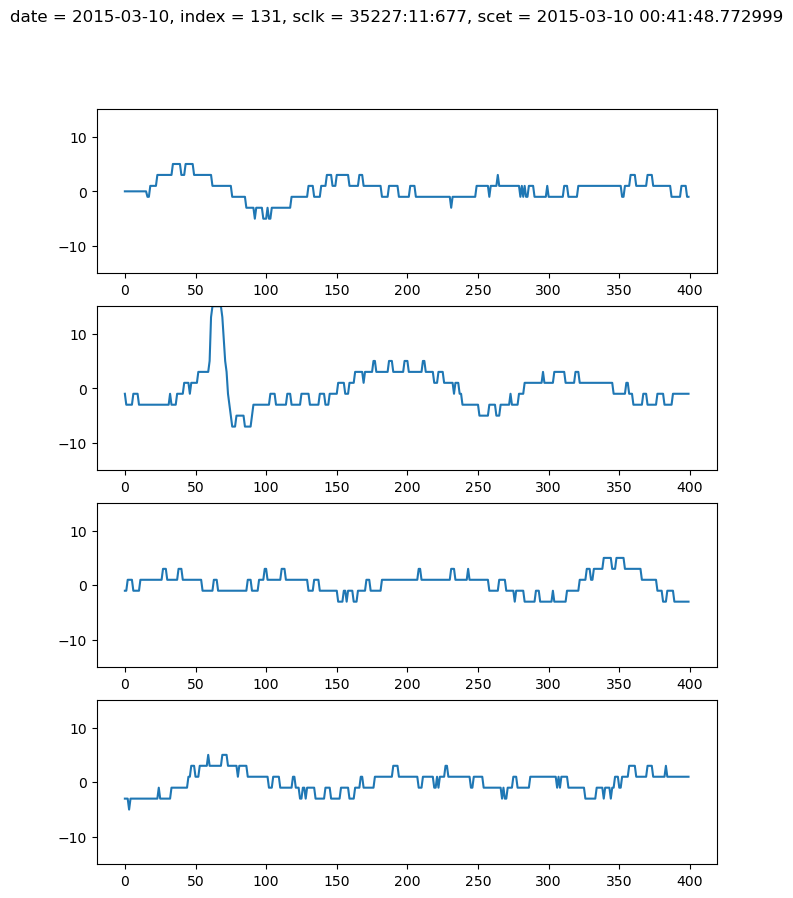

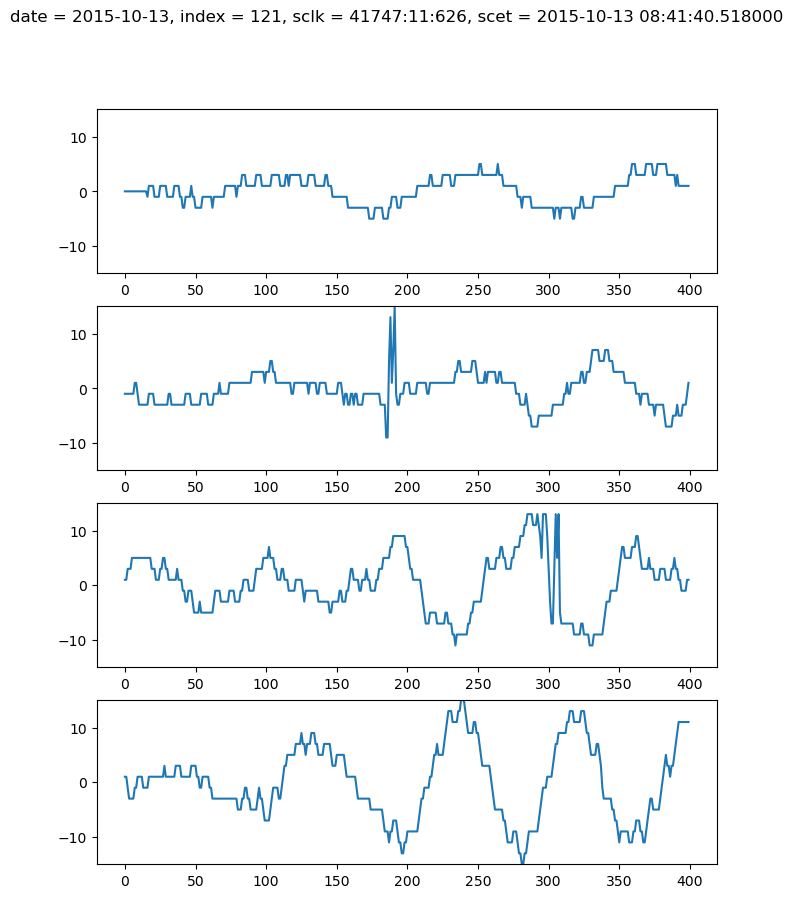

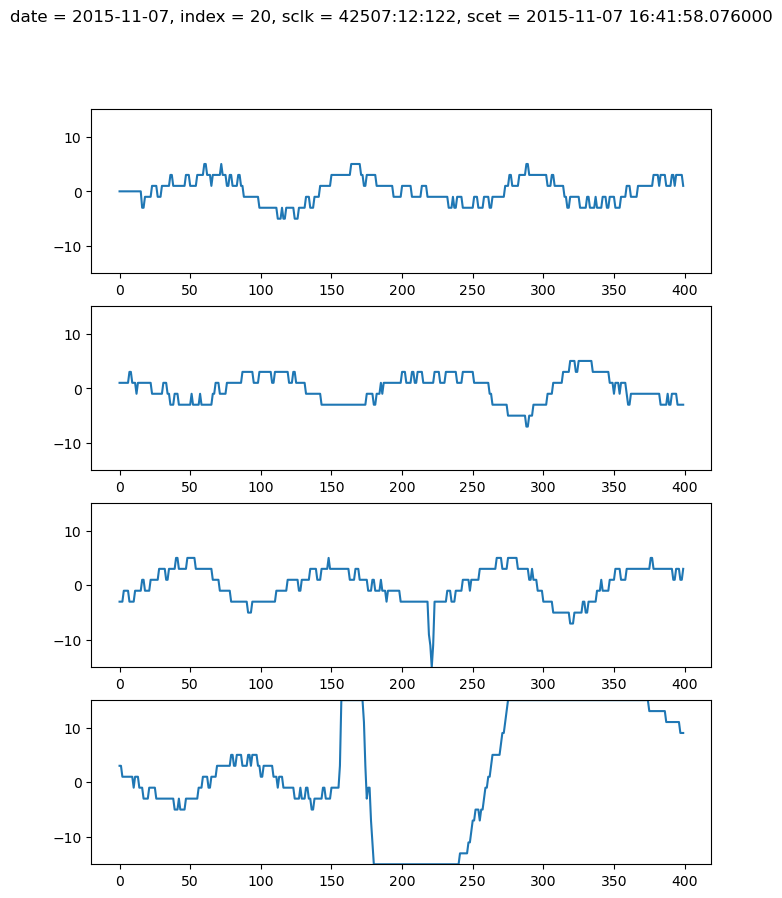

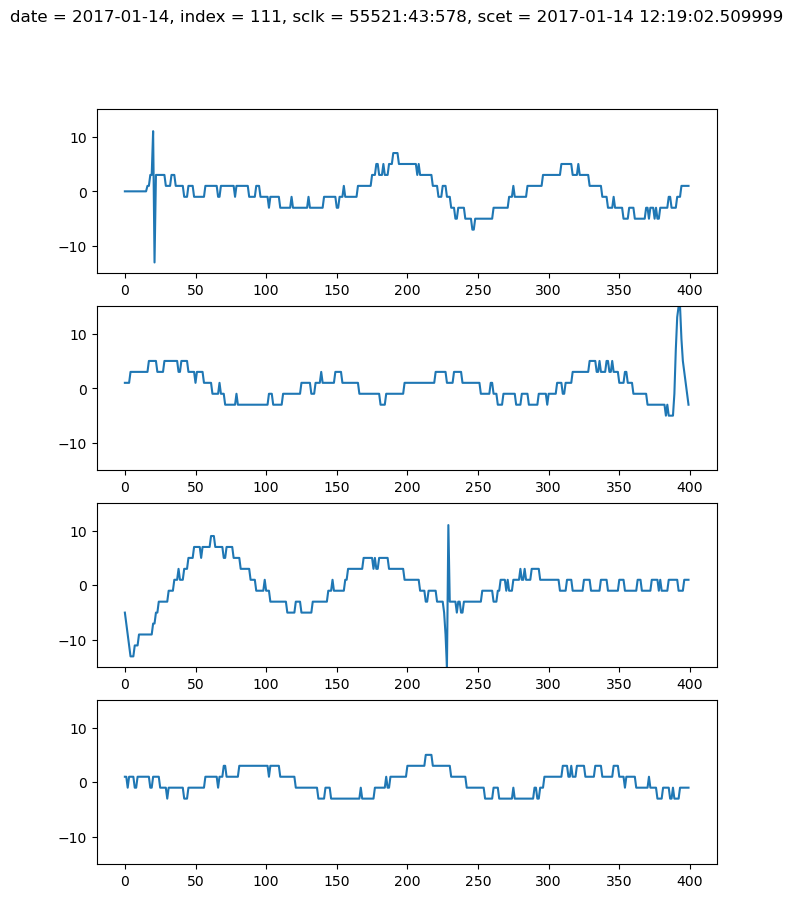

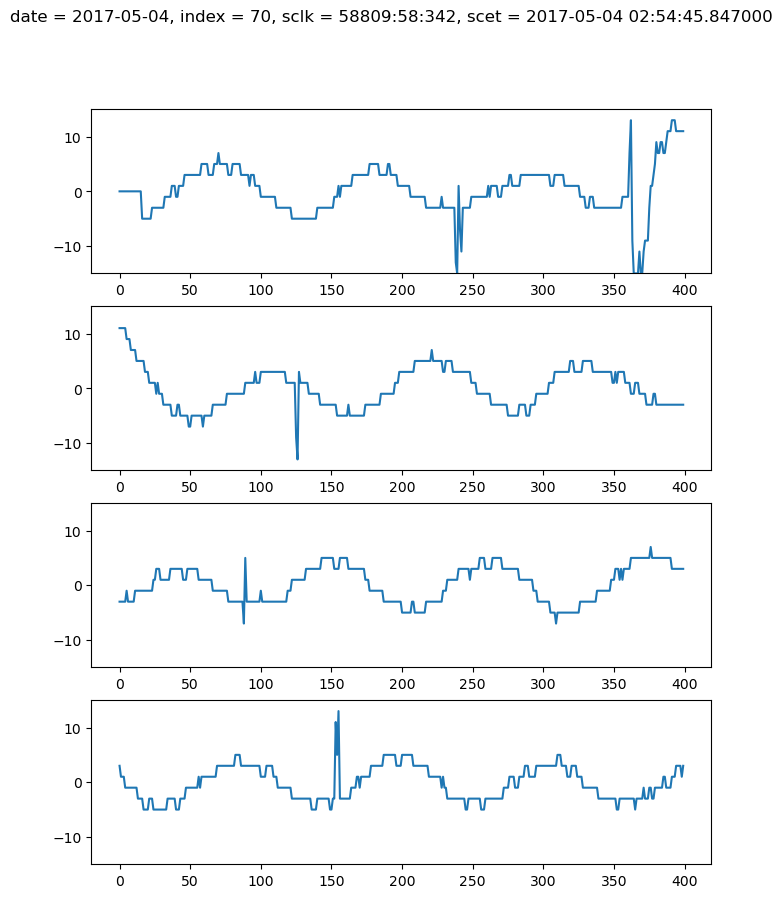

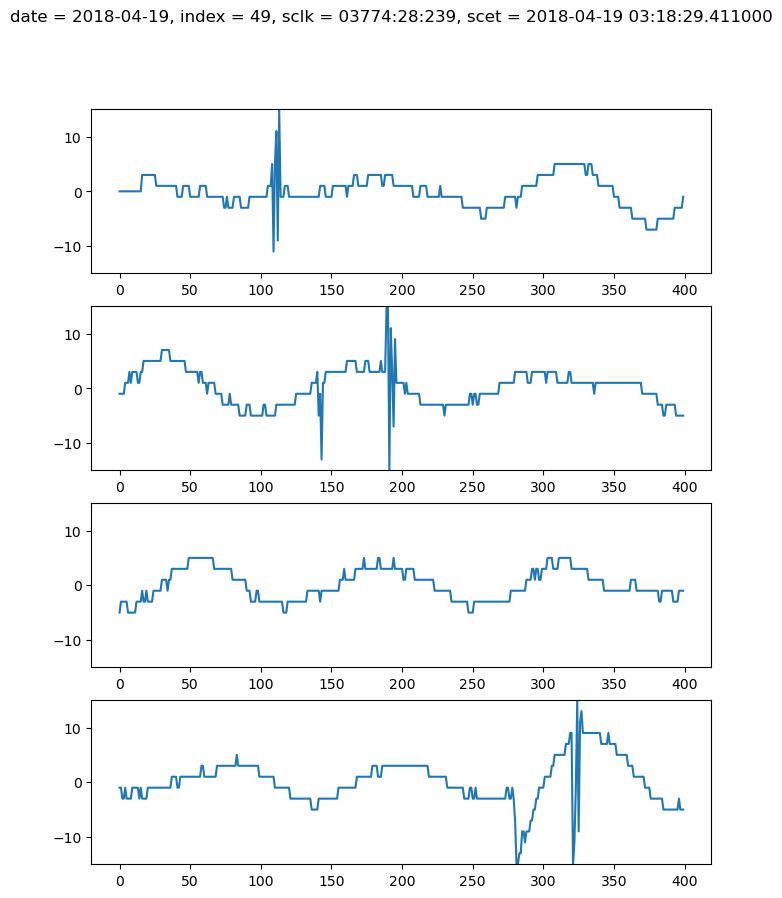

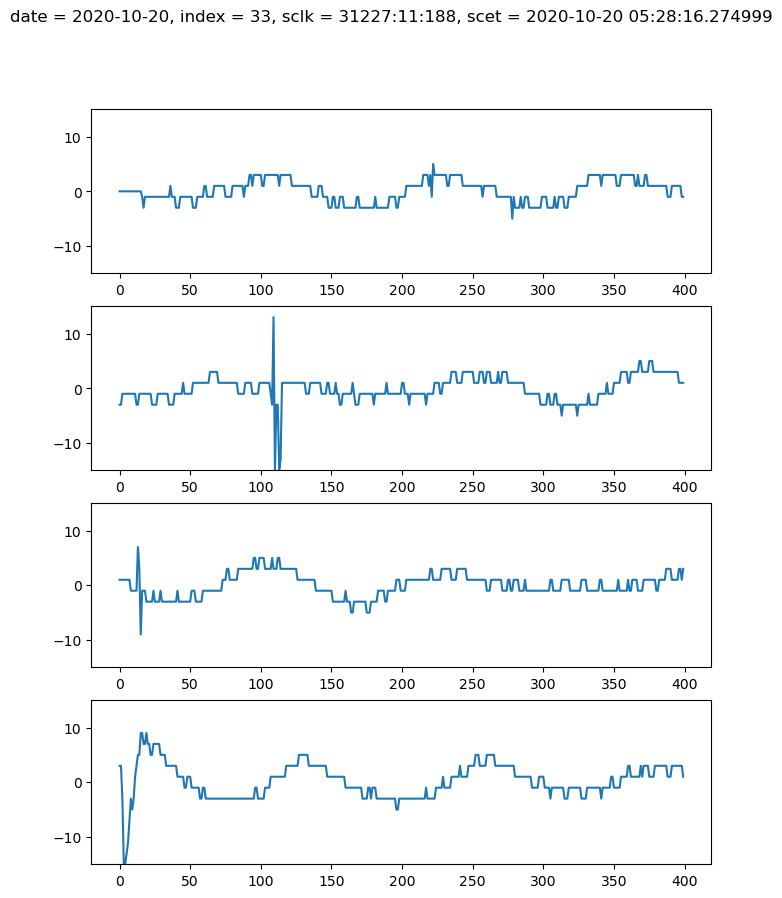

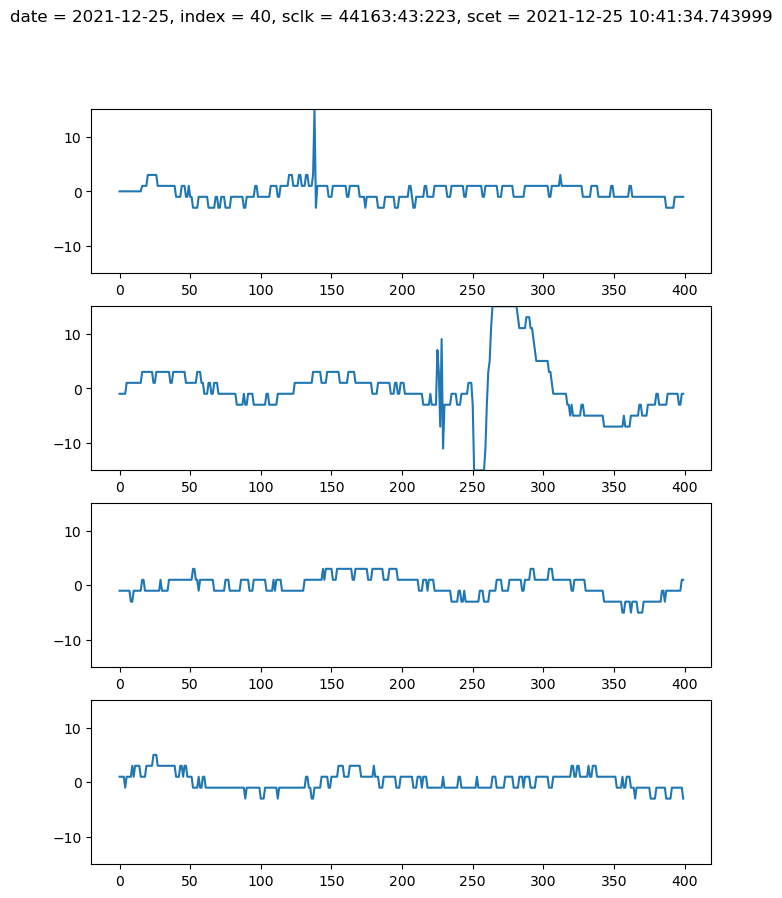

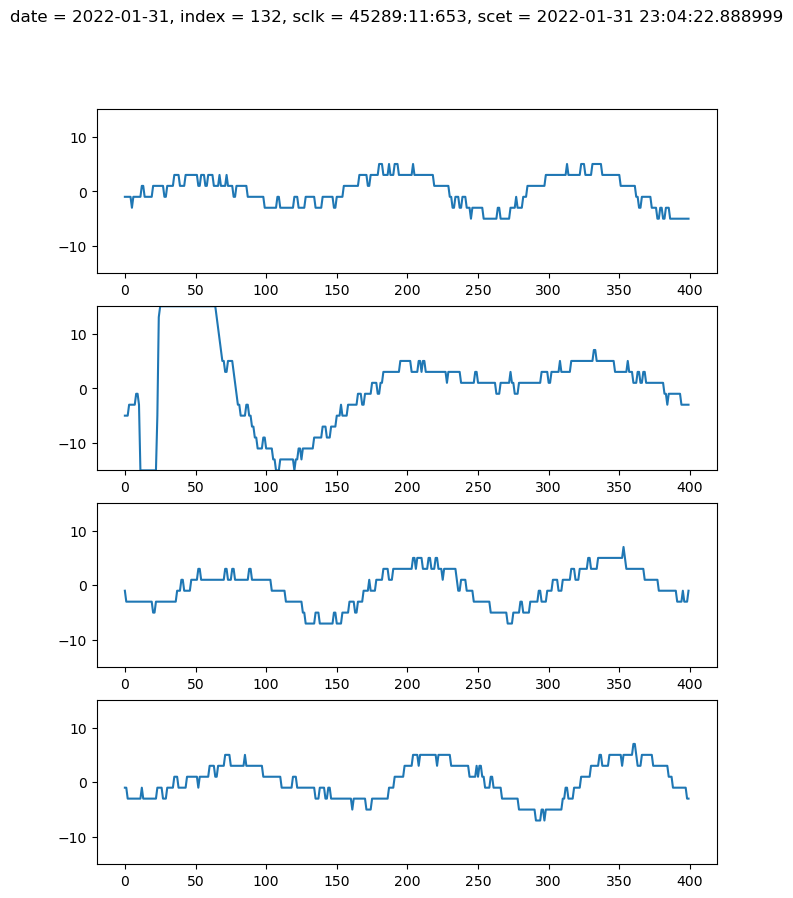

In [4]:
for ind, row in sheets.iterrows():
    # loop through rows to get the date and scet time
    date_str = row['YYYY-MM-DD']
    index = row['indexs']
    cdf_file_path = row['cdf_file_paths']
    
    # find the path and extract the information from cdf
    cdf = pycdf.CDF(cdf_file_path)
    time = cdf['Epoch'][:]
    part = cdf['Part'][:]
    sclks = cdf['SCLK'][:].tolist()
    waveform = cdf['Waveform'][:]
    time_offsets = cdf['timeOffsets'][:]

    # Print basic info
    print(f'date = {date_str}, sclk = {sclks[index]}, scet = {time[index]}')
    
    
    # Plot / Graph
    # get the 1600 points from 'Waveform'
    x = waveform[index, :]

    # Reshape the data into four sections with 400 length each
    data_sections = np.split(x, 4)

    # Set the figure size and dpi
    fig = plt.figure(figsize=(8, 10), dpi=100)

    # Add four subplots vertically
    for i in range(4):
        ax = fig.add_subplot(4, 1, i+1)
        ax.plot(data_sections[i])
        ax.set_ylim(-15, 15)
        # ax.set_xlim(400*i, 400*(i+1)-1)
        # ax.set_title(f"Section {i+1}")

    # Set the main title on top
    fig.suptitle(f'date = {date_str}, index = {index}, sclk = {sclks[index]}, scet = {time[index]}')
    
    # Show the plot
    # plt.show()
    # tm.sleep(10)

    plt.savefig(f'hits_new/{sclks[index]}.png')
    plt.close
        


In [5]:
# save the information to csv file

hit_csv_str = './voyager-1-ml/hit.csv'
non_hit_csv_str = './voyager-1-ml/non_hit.csv'

In [6]:
# hit.csv generation
# clear the csv file before running
with open(hit_csv_str, 'w') as file:
    file.write('')

hit_file = open(hit_csv_str, 'a')

for ind, row in sheets.iterrows():
    # loop through rows to get the date and scet time
    date_str = row['YYYY-MM-DD']
    index = row['indexs']
    cdf_file_path = row['cdf_file_paths']
    
    # find the path and extract the information from cdf
    cdf = pycdf.CDF(cdf_file_path)
    time = cdf['Epoch'][:]
    part = cdf['Part'][:]
    sclks = cdf['SCLK'][:].tolist()
    waveform = cdf['Waveform'][:]
    time_offsets = cdf['timeOffsets'][:]

    # Print basic info
    # print(f'date = {date_str}, sclk = {sclks[index]}, scet = {time[index]}')
    
    
    # Plot / Graph
    # get the 1600 points from 'Waveform'
    x = waveform[index, :]
    x_r = -x # double the data by reverse the sign
    np.savetxt(hit_file, x.reshape(1,-1), delimiter=',', fmt='%d')
    np.savetxt(hit_file, x_r.reshape(1,-1), delimiter=',', fmt='%d')
    
hit_file.close()
print('hit_csv_file generated')

hit_csv_file generated


In [7]:
# test read the data
data = np.genfromtxt(hit_csv_str, delimiter=',')

# Print the array
print(data.shape)

(122, 1600)


In [8]:
# non_hit.csv generation
# clear the csv file before running
with open(non_hit_csv_str, 'w') as file:
    file.write('')

non_hit_file = open(non_hit_csv_str, 'a')

for ind, row in sheets.iterrows():
    # loop through rows to get the date and scet time
    date_str = row['YYYY-MM-DD']
    index = row['indexs']
    cdf_file_path = row['cdf_file_paths']
    
    # find the path and extract the information from cdf
    cdf = pycdf.CDF(cdf_file_path)
    time = cdf['Epoch'][:]
    part = cdf['Part'][:]
    sclks = cdf['SCLK'][:].tolist()
    waveform = cdf['Waveform'][:]
    time_offsets = cdf['timeOffsets'][:]

    # Print basic info
    # print(f'date = {date_str}, sclk = {sclks[index]}, scet = {time[index]}')
    
    
    # Plot / Graph
    # get the 1600 points from 'Waveform'
    x = waveform[index-2, :]
    np.savetxt(non_hit_file, x.reshape(1,-1), delimiter=',', fmt='%d')
    x = waveform[index-3, :]
    np.savetxt(non_hit_file, x.reshape(1,-1), delimiter=',', fmt='%d')
    x = waveform[index-4, :]
    np.savetxt(non_hit_file, x.reshape(1,-1), delimiter=',', fmt='%d')
    x = waveform[index+3, :]
    np.savetxt(non_hit_file, x.reshape(1,-1), delimiter=',', fmt='%d')
    
non_hit_file.close()
print('non_hit_csv_file generated')

non_hit_csv_file generated


In [9]:
# test read the data
data = np.genfromtxt(non_hit_csv_str, delimiter=',')

# Print the array
print(data.shape)

(244, 1600)
